<center><b><big>A STUDY OF METROPOLITANS OF INDIA</big></b></center>
<center><SMALL> COMPARING AND CONTRASTING THE NEIGHBORHOODS OF THE 4 METROS - DELHI, MUMBAI, KOLKATA AND CHENNAI</SMALL></center>

### Data colection and cleaning

In [ ]:
#installing necessary packages
!conda install -c conda-forge geopy --yes
!conda install -c conda-forge folium=0.5.0 --yes


In [1]:
#importing libraries
import pandas as pd
import numpy as np
import requests
from geopy.geocoders import Nominatim
from IPython.display import Image 
from IPython.core.display import HTML 
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium


In [2]:
#reading dataset
dataset=pd.read_csv(r'D:\Downloads\all_india_PO_list_without_APS_offices_ver2_lat_long.csv')

In [3]:
#cleaning up irrelevant columns
df1=dataset[['officename' ,'pincode', 'regionname']]
df1.rename(columns = {"officename": "neighborhood"},inplace = True) 
df = df1.groupby(['pincode', 'regionname'], sort = False).agg(','.join)
df.reset_index(inplace=True)
df.head()

C:\Users\91984\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,pincode,regionname,neighborhood
0,504273,Hyderabad,"Achalapur B.O,Ainam B.O,Bhimini B.O,Bibra B.O,..."
1,504293,Hyderabad,"Ada B.O,Asifabad S.O,Babapur B.O,Burguda B.O,D..."
2,504307,Hyderabad,"Adegaon B.O,Boregaon B.O,Echoda S.O,Girjam B.O..."
3,504001,Hyderabad,"Adilabad Collectorate S.O,Adilabad H.O,Bhagyan..."
4,504251,Hyderabad,"Agm Colony S.O,Aknepalli B.O,Bellampalli R.S. ..."


In [4]:
#reading dataset contaaining location data
ind=pd.read_csv(r'C:\Users\91984\Desktop\in.csv')
ind.rename(columns = {"key": "pincode","place_name": "neighborhood","admin_name1": "city"},inplace = True) 
del ind['neighborhood']
del ind['city']
del ind['accuracy']
ind.head()

,pincode,latitude,longitude
0,110001,28.6333,77.2167
1,110002,28.6333,77.2500
2,110003,28.6500,77.2167
3,110004,28.6500,77.2167
4,110005,28.6500,77.2000


In [5]:
#merging the 2 to get final dataset
d=pd.merge(ind, df, on='pincode')
d.head()

,pincode,latitude,longitude,regionname,neighborhood
0,110001,28.6333,77.2167,Delhi,"Baroda House S.O,Bengali Market S.O,Bhagat Sin..."
1,110002,28.6333,77.2500,Delhi,"A.G.C.R. S.O,Ajmeri Gate Extn. S.O,Darya Ganj ..."
2,110003,28.6500,77.2167,Delhi,"Delhi High Court Extension Counter S.O,Delhi H..."
3,110004,28.6500,77.2167,Delhi,Rashtrapati Bhawan S.O
4,110005,28.6500,77.2000,Delhi,"Anand Parbat Indl. Area S.O,Anand Parbat S.O,B..."


### Obtain individual datasets for each city

In [6]:
delhi=d.loc[d['regionname'] == 'Delhi']
delhi.reset_index()
delhi

,pincode,latitude,longitude,regionname,neighborhood
0,110001,28.6333,77.2167,Delhi,"Baroda House S.O,Bengali Market S.O,Bhagat Sin..."
1,110002,28.6333,77.2500,Delhi,"A.G.C.R. S.O,Ajmeri Gate Extn. S.O,Darya Ganj ..."
2,110003,28.6500,77.2167,Delhi,"Delhi High Court Extension Counter S.O,Delhi H..."
3,110004,28.6500,77.2167,Delhi,Rashtrapati Bhawan S.O
4,110005,28.6500,77.2000,Delhi,"Anand Parbat Indl. Area S.O,Anand Parbat S.O,B..."
...,...,...,...,...,...
74,110091,28.6488,77.1726,Delhi,"Chilla B.O,Himmatpuri S.O,Kalyanpuri S.O,Kalya..."
75,110092,28.6488,77.1726,Delhi,"Anand Vihar S.O,IP Extension S.O,Laxmi Nagar S..."
76,110093,28.6488,77.1726,Delhi,"Harsh Vihar S.O,Loni Road Housing Complex S.O,..."
77,110094,28.6488,77.1726,Delhi,"Dayalpur B.O,Gokal Puri S.O,Johripur B.O,Khazu..."


In [7]:
#mumbai
mumbai=d.loc[d['regionname'] == 'Mumbai']
mumbai.reset_index(inplace=True)
del mumbai['index']
mumbai

,pincode,latitude,longitude,regionname,neighborhood
0,400001,19.0167,72.8500,Mumbai,"Bazargate S.O,Elephanta Caves Po B.O,M.P.T. S...."
1,400002,19.0167,72.8500,Mumbai,"Kalbadevi H.O,Ramwadi S.O,S. C. Court S.O,Thak..."
2,400003,19.0167,72.8500,Mumbai,"B.P.Lane S.O,Mandvi S.O (Mumbai),Masjid S.O,Nu..."
3,400004,19.0167,72.8500,Mumbai,"Ambewadi S.O (Mumbai),Charni Road S.O,Chaupati..."
4,400005,19.0167,72.8500,Mumbai,"Asvini S.O,Colaba Bazar S.O,Colaba S.O,Holiday..."
...,...,...,...,...,...
92,410208,18.8389,73.6833,Mumbai,"Devichapada B.O,Koynavale B.O,Navde B.O,Padghe..."
93,421101,19.1833,73.2083,Mumbai,"Padgha Extension Counter,Padgha S.O"
94,421301,19.1833,73.2083,Mumbai,"Kalyan City H.O,Kalyan D.C. S.O,Kalyan Rs S.O,..."
95,421303,19.1833,73.2083,Mumbai,"Abitghar B.O,Abje B.O,Alonde B.O,Baliwali B.O,..."


In [8]:
#kolkata
kolkata=d.loc[d['regionname'] == 'Calcutta']
kolkata.reset_index(inplace=True)
del kolkata['index']
kolkata

,pincode,latitude,longitude,regionname,neighborhood
0,700001,22.5690,88.3697,Calcutta,"Council House Street S.O,Customs House S.O,Khe..."
1,700002,22.5690,88.3697,Calcutta,"Cossipore Gun Factory S.O,Cossipore H.O,Indian..."
2,700003,22.5690,88.3697,Calcutta,"Amrita Bazar Partika S.O,Baghbazar S.O,Girish ..."
3,700004,22.5690,88.3697,Calcutta,"R.G.Kar Medical College S.O,Shyambazar Mail S...."
4,700005,22.5690,88.3697,Calcutta,"Ahritola S.O,Hatkhola S.O"
...,...,...,...,...,...
175,731241,22.9667,88.7833,Calcutta,"Chandpara S.O,Dunigram B.O,Koyemba B.O,Nonadan..."
176,731243,22.9667,88.7833,Calcutta,"Ayas B.O,Banior B.O,Bautia B.O,Bhabanandapur B..."
177,731301,23.8333,87.8167,Calcutta,"Barha B.O,Belhati B.O,Ch.Nanoor S.O,Charkolgra..."
178,731303,23.8333,87.8167,Calcutta,"Abadanga B.O,Bhalas B.O,Bhatra B.O,Bipratikuri..."


In [9]:
#chennai
Chennai=d.loc[d['regionname'] == 'Chennai Region']
Chennai.reset_index(inplace=True)
del Chennai['index']
Chennai

,pincode,latitude,longitude,regionname,neighborhood
0,600001,13.0656,80.2672,Chennai Region,"Flower Bazaar S.O,Govt Stanley Hospital S.O,Ma..."
1,600002,13.0656,80.2672,Chennai Region,"Anna Road H.O,Chintadripet S.O,Madras Electric..."
2,600003,13.0656,80.2672,Chennai Region,"Edapalayam S.O,Madras Medical College S.O,Park..."
3,600004,13.0656,80.2672,Chennai Region,"Mandaveli S.O,Mylapore H.O,Vivekananda College..."
4,600005,13.0594,80.2789,Chennai Region,"Chepauk S.O,Madras University S.O,Tiruvallikke..."
...,...,...,...,...,...
136,632504,12.7667,79.4167,Chennai Region,"Damarapakkam S.O,Valayathur B.O"
137,632505,12.7667,79.4167,Chennai Region,"Ayal B.O,Banavaram S.O,Govindacherrykuppam B.O..."
138,632506,12.7667,79.4167,Chennai Region,"Agaram B.O,Arumbakkam B.O,Chennasamudram B.O,G..."
139,632511,12.9333,79.3833,Chennai Region,"Ananthangal B.O,Brammadesam B.O,Esayanur B.O,J..."


### choose a non metropolitan city for comparison's sake

In [20]:
#kanpur
kanpur=d.loc[d['regionname'] == 'Kanpur']
kanpur.reset_index(inplace=True)
del kanpur['index']
kanpur

,pincode,latitude,longitude,regionname,neighborhood
0,208001,26.4750,80.3083,Kanpur,"B N Shukla & Sons S.O,Birhana Raod S.O,Colonel..."
1,208002,26.4750,80.3083,Kanpur,"Agriculture College S.O,Arya Nagar S.O (Kanpur..."
2,208003,26.4750,80.3083,Kanpur,"Anwarganj S.O,Chauki Jarib S.O"
3,208004,26.4750,80.3083,Kanpur,"Kanpur Cantt. H.O,Khapra Mohal S.O,Meerpur Can..."
4,208005,26.4750,80.3083,Kanpur,"Hns Nagar S.O,Industrial Estate S.O (Kanpur Na..."
5,208007,26.4750,80.3083,Kanpur,"Cambridge Road S.O,Gandhi Grame S.O,Hal Colony..."
6,208010,26.4833,80.2667,Kanpur,"J K Puri S.O,Shiwans Tanney S.O"
7,208011,26.4833,80.2667,Kanpur,"Anand Nagar S.O (Kanpur Nagar),Kidwai Nagar S...."
8,208012,26.4833,80.2667,Kanpur,"D O Oil Mill S.O,Jawahar Nagar S.O (Kanpur Nag..."
9,208013,26.4833,80.2667,Kanpur,"COD S.O (Kanpur Nagar),Dmsrde S.O,Shyam Nagar ..."


### Visualize each

In [21]:
#kanpur
from geopy.geocoders import Nominatim
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium
#address = 'Mumbai'
#geolocator = Nominatim(user_agent="Toronto_explorer")
#location = geolocator.geocode(address)
#latitude = location.latitude
#longitude = location.longitude

Tomap = folium.Map(location=[26.4750,80.3083], zoom_start=10)

for lat, lng, city, neighborhood in zip(kanpur['latitude'], kanpur['longitude'], 
                                           kanpur['regionname'], kanpur['neighborhood']):
    label = '{}, {}'.format(neighborhood,city )
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(Tomap)  
    
Tomap

In [10]:
#chennai
from geopy.geocoders import Nominatim
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium
#address = 'Mumbai'
#geolocator = Nominatim(user_agent="Toronto_explorer")
#location = geolocator.geocode(address)
#latitude = location.latitude
#longitude = location.longitude

Tomap = folium.Map(location=[13.0656,80.2672], zoom_start=10)

for lat, lng, city, neighborhood in zip(Chennai['latitude'], Chennai['longitude'], 
                                           Chennai['regionname'], Chennai['neighborhood']):
    label = '{}, {}'.format(neighborhood,city )
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(Tomap)  
    
Tomap

In [11]:
Tomap = folium.Map(location=[19.0167,72.85], zoom_start=10)

for lat, lng, city, neighborhood in zip(mumbai['latitude'], mumbai['longitude'], 
                                           mumbai['regionname'], mumbai['neighborhood']):
    label = '{}, {}'.format(neighborhood,city )
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill_opacity=0.7,
        parse_html=False).add_to(Tomap)  
    
Tomap

In [12]:
#delhi
dmap = folium.Map(location=[28.6333,77.2167], zoom_start=10)

for lat, lng, city, neighborhood in zip(delhi['latitude'], delhi['longitude'], 
                                           delhi['regionname'],delhi['neighborhood']):
    label = '{}, {}'.format(neighborhood,city )
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='#69527E',
        fill=True,
        fill_color='#DCD5F6',
        fill_opacity=0.7,
        parse_html=False).add_to(dmap)  
    
dmap

In [13]:
dmap = folium.Map(location=[22.5690,88.3697], zoom_start=7)

for lat, lng, city, neighborhood in zip(kolkata['latitude'], kolkata['longitude'], 
                                           kolkata['regionname'],kolkata['neighborhood']):
    label = '{}, {}'.format(neighborhood,city )
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        color='#D9364E',
        fill=True,
        fill_color='#D9364E',
        fill_opacity=0.7,
        parse_html=False).add_to(dmap)  
    
dmap

In [14]:
#segmentation
#define 4square credentials
CLIENT_ID = 'OQYWSZCAO25AV4Z3KPAZQXOKTGGAIQBJHJXSLLXOFG3I0DRW' # your Foursquare ID
CLIENT_SECRET = 'LRONLXGCQQFSHIBIBN4Z3X2WT0CCXUZFRREYSXO1G1QGXM4H' # your Foursquare Secret
VERSION = '20180605'


In [15]:
#create a function to interact with the foursquare  API to get venue data
LIMIT = 7
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [16]:
delhi_venues=getNearbyVenues(names=delhi['neighborhood'],
                                   latitudes=delhi['latitude'],
                                   longitudes=delhi['longitude']
                                  )

Baroda House S.O,Bengali Market S.O,Bhagat Singh Market S.O,Connaught Place S.O,Constitution House S.O,Election Commission S.O,Janpath S.O,Krishi Bhawan S.O,Lady Harding Medical College S.O,North Avenue S.O,Parliament House S.O,Patiala House S.O,Pragati Maidan Camp S.O,Pragati Maidan S.O,Rail Bhawan S.O,Sansad Marg H.O,Sansadiya Soudh S.O,Secretariat North S.O,Shastri Bhawan S.O,Supreme Court S.O,New Delhi G.P.O. 
A.G.C.R. S.O,Ajmeri Gate Extn. S.O,Darya Ganj S.O,Gandhi Smarak Nidhi S.O,I.P.Estate S.O,Indraprastha H.O,Minto Road S.O
Delhi High Court Extension Counter S.O,Delhi High Court S.O,Pandara Road S.O,Aliganj S.O (South Delhi),C G O Complex S.O,Golf Links S.O,Kasturba Nagar S.O (South Delhi),Lodi Road H.O,Pragati Vihar S.O,Safdarjung Air Port S.O
Rashtrapati Bhawan S.O
Anand Parbat Indl. Area S.O,Anand Parbat S.O,Bank Street S.O (Central Delhi),Desh Bandhu Gupta Road S.O,Guru Gobind Singh Marg S.O,Karol Bagh S.O,Master Prithvi Nath Marg S.O,Sat Nagar S.O
Delhi G.P.O. ,Baratooti 

In [22]:
d_areas=delhi_venues['Venue Category'].nunique()
delhi_venues['Venue Category'].value_counts()


Hotel                      57
Fast Food Restaurant       44
Coffee Shop                40
Indian Restaurant          39
Café                       38
Donut Shop                 28
Bar                        27
Arcade                     27
Restaurant                 23
ATM                        15
Historic Site              11
Art Gallery                10
Electronics Store          10
Spa                         9
Snack Place                 8
Train Station               8
IT Services                 6
Food & Drink Shop           5
Tibetan Restaurant          4
Clothing Store              4
Breakfast Spot              2
Juice Bar                   2
Playground                  2
Mobile Phone Shop           2
Light Rail Station          2
South Indian Restaurant     1
Athletics & Sports          1
History Museum              1
Food Truck                  1
BBQ Joint                   1
Stadium                     1
Miscellaneous Shop          1
Pizza Place                 1
Men's Stor

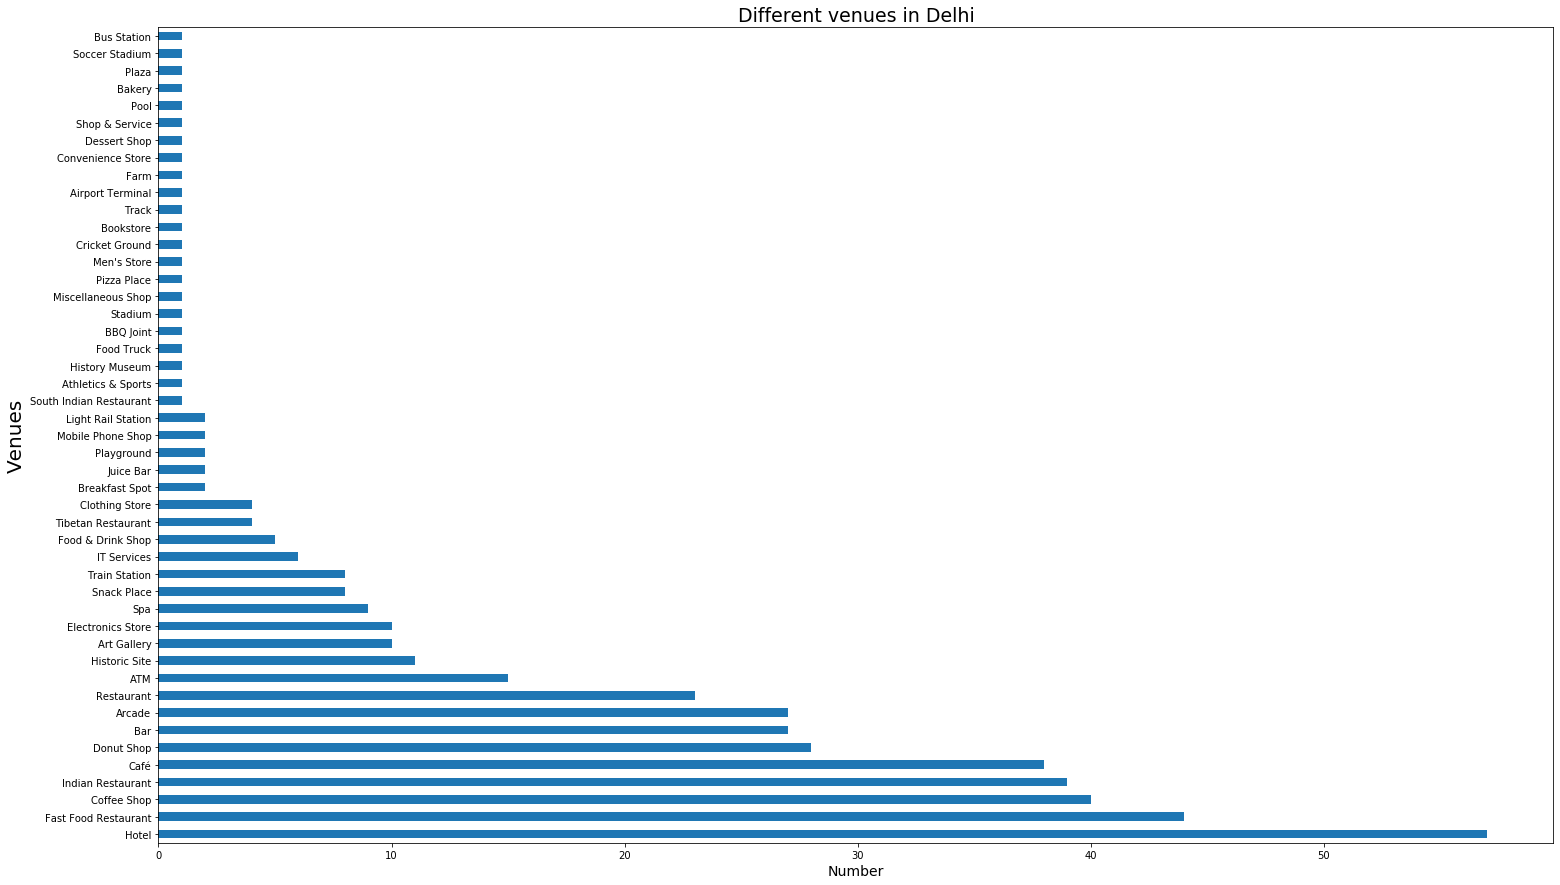

In [24]:
import matplotlib.pyplot as plt
delhi_venues['Venue Category'].value_counts().plot(kind='barh', figsize=(25, 15))
plt.ylabel("Venues", fontsize=20)
plt.xlabel("Number", fontsize=14)
plt.title("Different venues in Delhi",fontsize=19);

In [25]:
#get dummy values indication numbers of each category
#one hot encoding
d_onehot = pd.get_dummies(delhi_venues[['Venue Category']], prefix="", prefix_sep="")
# add neighborhood column back to dataframe
d_onehot['neighborhood'] =delhi_venues['Neighborhood'] 
fixed_columns = [d_onehot.columns[-1]] + list(d_onehot.columns[:-1])
d_onehot = d_onehot[fixed_columns]
d_onehot.head()



,neighborhood,ATM,Airport Terminal,Arcade,Art Gallery,Athletics & Sports,BBQ Joint,Bakery,Bar,Bookstore,...,Restaurant,Shop & Service,Snack Place,Soccer Stadium,South Indian Restaurant,Spa,Stadium,Tibetan Restaurant,Track,Train Station
0,"Baroda House S.O,Bengali Market S.O,Bhagat Sin...",0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Baroda House S.O,Bengali Market S.O,Bhagat Sin...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,"Baroda House S.O,Bengali Market S.O,Bhagat Sin...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Baroda House S.O,Bengali Market S.O,Bhagat Sin...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Baroda House S.O,Bengali Market S.O,Bhagat Sin...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
#with 5 common venues
delhi_neighbourhood= d_onehot.groupby('neighborhood').mean().reset_index()
delhi_neighbourhood

,neighborhood,ATM,Airport Terminal,Arcade,Art Gallery,Athletics & Sports,BBQ Joint,Bakery,Bar,Bookstore,...,Restaurant,Shop & Service,Snack Place,Soccer Stadium,South Indian Restaurant,Spa,Stadium,Tibetan Restaurant,Track,Train Station
0,"505 A B Workshop S.O,A F Palam S.O,Aps Colony ...",0.0,0.0,0.000000,0.142857,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
1,"A F Rajokari S.O,Rajokari B.O",0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
2,"A.G.C.R. S.O,Ajmeri Gate Extn. S.O,Darya Ganj ...",0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.142857,0.0,0.000000,0.142857,0.000000,0.0,0.0
3,"A.K.Market S.O,Multani Dhanda S.O,Pahar Ganj S...",0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.285714,0.0,0.0,0.000000,0.0,0.142857,0.000000,0.000000,0.0,0.0
4,"Abul Fazal Enclave-I S.O,Jamia Nagar S.O,New F...",0.0,0.0,0.142857,0.000000,0.0,0.0,0.0,0.142857,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,"R K Puram (Main) S.O,R K Puram West S.O",0.0,0.0,0.142857,0.000000,0.0,0.0,0.0,0.142857,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
74,"R K Puram Sect-1 S.O,R K Puram Sect-12 S.O,R K...",0.0,0.0,0.142857,0.000000,0.0,0.0,0.0,0.142857,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
75,Rajender Nagar S.O,0.0,0.0,0.142857,0.000000,0.0,0.0,0.0,0.142857,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
76,Rashtrapati Bhawan S.O,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.142857,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.142857,0.0,0.0


In [46]:
num_top_venues = 5

for hood in delhi_neighbourhood['neighborhood']:
    print("----"+hood+"----")
    temp = delhi_neighbourhood[delhi_neighbourhood['neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','frequency']
    temp = temp.iloc[1:]
    temp['frequency'] = temp['frequency'].astype(float)
    temp = temp.round({'frequency': 2})
    print(temp.sort_values('frequency', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----505 A B Workshop S.O,A F Palam S.O,Aps Colony B.O,Bazar Road S.O,C.V.D. S.O,COD S.O (South West Delhi),Delhi Cantt S.O,Dhaula Kuan S.O,Kirby Place S.O,Pinto Park S.O,R R Hospital S.O,Signal Enclave S.O,Station Road S.O (South West Delhi),Subroto Park S.O----
                  venue  frequency
0         Historic Site       0.14
1                  Café       0.14
2  Fast Food Restaurant       0.14
3     Electronics Store       0.14
4           Coffee Shop       0.14


----A F Rajokari S.O,Rajokari B.O----
               venue  frequency
0  Indian Restaurant        1.0
1                ATM        0.0
2              Plaza        0.0
3        IT Services        0.0
4          Juice Bar        0.0


----A.G.C.R. S.O,Ajmeri Gate Extn. S.O,Darya Ganj S.O,Gandhi Smarak Nidhi S.O,I.P.Estate S.O,Indraprastha H.O,Minto Road S.O----
                  venue  frequency
0         Historic Site       0.14
1        Soccer Stadium       0.14
2  Fast Food Restaurant       0.14
3        Cricket Ground 

In [47]:
#convert to dataframe
#sort in descending

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [48]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['neighborhood'] = delhi_neighbourhood['neighborhood']

for ind in np.arange(delhi_neighbourhood.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(delhi_neighbourhood.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"505 A B Workshop S.O,A F Palam S.O,Aps Colony ...",Historic Site,Coffee Shop,Fast Food Restaurant,Electronics Store,Indian Restaurant,Café,Art Gallery,BBQ Joint,Bakery,Airport Terminal
1,"A F Rajokari S.O,Rajokari B.O",Indian Restaurant,Train Station,Food Truck,Fast Food Restaurant,Farm,Electronics Store,Donut Shop,Dessert Shop,Cricket Ground,Convenience Store
2,"A.G.C.R. S.O,Ajmeri Gate Extn. S.O,Darya Ganj ...",Historic Site,Soccer Stadium,History Museum,Cricket Ground,Clothing Store,Fast Food Restaurant,Stadium,Art Gallery,Coffee Shop,Farm
3,"A.K.Market S.O,Multani Dhanda S.O,Pahar Ganj S...",Hotel,Indian Restaurant,Restaurant,Spa,Train Station,Café,Electronics Store,Donut Shop,Dessert Shop,Cricket Ground
4,"Abul Fazal Enclave-I S.O,Jamia Nagar S.O,New F...",Café,Fast Food Restaurant,Arcade,Hotel,Donut Shop,Bar,Coffee Shop,Clothing Store,Farm,Electronics Store


In [49]:
#k means clustering on delhi_neighborhood

# set number of clusters
kclusters = 5
#drop the non numeric column
d_cluster = delhi_neighbourhood.drop('neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(d_cluster)

# check cluster labels generated for each row in the dataframe

labels=kmeans.labels_
labels.dtype
neighborhoods_venues_sorted['labels']=labels
#neighborhoods_venues_sorted.dtypes
neighborhoods_venues_sorted

,neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,labels
0,"505 A B Workshop S.O,A F Palam S.O,Aps Colony ...",Historic Site,Coffee Shop,Fast Food Restaurant,Electronics Store,Indian Restaurant,Café,Art Gallery,BBQ Joint,Bakery,Airport Terminal,2
1,"A F Rajokari S.O,Rajokari B.O",Indian Restaurant,Train Station,Food Truck,Fast Food Restaurant,Farm,Electronics Store,Donut Shop,Dessert Shop,Cricket Ground,Convenience Store,1
2,"A.G.C.R. S.O,Ajmeri Gate Extn. S.O,Darya Ganj ...",Historic Site,Soccer Stadium,History Museum,Cricket Ground,Clothing Store,Fast Food Restaurant,Stadium,Art Gallery,Coffee Shop,Farm,2
3,"A.K.Market S.O,Multani Dhanda S.O,Pahar Ganj S...",Hotel,Indian Restaurant,Restaurant,Spa,Train Station,Café,Electronics Store,Donut Shop,Dessert Shop,Cricket Ground,0
4,"Abul Fazal Enclave-I S.O,Jamia Nagar S.O,New F...",Café,Fast Food Restaurant,Arcade,Hotel,Donut Shop,Bar,Coffee Shop,Clothing Store,Farm,Electronics Store,2
...,...,...,...,...,...,...,...,...,...,...,...,...
73,"R K Puram (Main) S.O,R K Puram West S.O",Café,Fast Food Restaurant,Arcade,Hotel,Donut Shop,Bar,Coffee Shop,Clothing Store,Farm,Electronics Store,2
74,"R K Puram Sect-1 S.O,R K Puram Sect-12 S.O,R K...",Café,Fast Food Restaurant,Arcade,Hotel,Donut Shop,Bar,Coffee Shop,Clothing Store,Farm,Electronics Store,2
75,Rajender Nagar S.O,Café,Fast Food Restaurant,Arcade,Hotel,Donut Shop,Bar,Coffee Shop,Clothing Store,Farm,Electronics Store,2
76,Rashtrapati Bhawan S.O,Hotel,Fast Food Restaurant,Tibetan Restaurant,Restaurant,Food & Drink Shop,Café,Farm,Electronics Store,Donut Shop,Dessert Shop,0


In [50]:
d_merged = delhi
# merge to add latitude/longitude for each neighborhood
d_merged = d_merged.join(neighborhoods_venues_sorted.set_index('neighborhood'), on='neighborhood')
#d_merged["labels"] = d_merged["labels"].astype(int)
#d_merged.shape
d_merged.dropna(axis=0,inplace=True)
d_merged["labels"] = d_merged["labels"].astype(int)
d_merged

,pincode,latitude,longitude,regionname,neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,labels
0,110001,28.6333,77.2167,Delhi,"Baroda House S.O,Bengali Market S.O,Bhagat Sin...",Food Truck,Café,South Indian Restaurant,Bakery,Plaza,Coffee Shop,Clothing Store,Fast Food Restaurant,Farm,Electronics Store,2
1,110002,28.6333,77.2500,Delhi,"A.G.C.R. S.O,Ajmeri Gate Extn. S.O,Darya Ganj ...",Historic Site,Soccer Stadium,History Museum,Cricket Ground,Clothing Store,Fast Food Restaurant,Stadium,Art Gallery,Coffee Shop,Farm,2
2,110003,28.6500,77.2167,Delhi,"Delhi High Court Extension Counter S.O,Delhi H...",Hotel,Fast Food Restaurant,Tibetan Restaurant,Restaurant,Food & Drink Shop,Café,Farm,Electronics Store,Donut Shop,Dessert Shop,0
3,110004,28.6500,77.2167,Delhi,Rashtrapati Bhawan S.O,Hotel,Fast Food Restaurant,Tibetan Restaurant,Restaurant,Food & Drink Shop,Café,Farm,Electronics Store,Donut Shop,Dessert Shop,0
4,110005,28.6500,77.2000,Delhi,"Anand Parbat Indl. Area S.O,Anand Parbat S.O,B...",Fast Food Restaurant,Indian Restaurant,BBQ Joint,Snack Place,Dessert Shop,Food & Drink Shop,Clothing Store,Farm,Electronics Store,Donut Shop,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,110091,28.6488,77.1726,Delhi,"Chilla B.O,Himmatpuri S.O,Kalyanpuri S.O,Kalya...",Café,Fast Food Restaurant,Arcade,Hotel,Donut Shop,Bar,Coffee Shop,Clothing Store,Farm,Electronics Store,2
75,110092,28.6488,77.1726,Delhi,"Anand Vihar S.O,IP Extension S.O,Laxmi Nagar S...",Café,Fast Food Restaurant,Arcade,Hotel,Donut Shop,Bar,Coffee Shop,Clothing Store,Farm,Electronics Store,2
76,110093,28.6488,77.1726,Delhi,"Harsh Vihar S.O,Loni Road Housing Complex S.O,...",Café,Fast Food Restaurant,Arcade,Hotel,Donut Shop,Bar,Coffee Shop,Clothing Store,Farm,Electronics Store,2
77,110094,28.6488,77.1726,Delhi,"Dayalpur B.O,Gokal Puri S.O,Johripur B.O,Khazu...",Café,Fast Food Restaurant,Arcade,Hotel,Donut Shop,Bar,Coffee Shop,Clothing Store,Farm,Electronics Store,2


In [51]:
#visualise

# create map
map_clusters = folium.Map(location=[28.6333,77.2167], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(d_merged['latitude'], d_merged['longitude'],d_merged['neighborhood'], d_merged['labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [52]:
mumbai_Venues = getNearbyVenues(names=mumbai['neighborhood'],
                                   latitudes=mumbai['latitude'],
                                   longitudes=mumbai['longitude']
                                  )




Bazargate S.O,Elephanta Caves Po B.O,M.P.T. S.O,Stock Exchange S.O,Tajmahal S.O,Town Hall S.O (Mumbai),Mumbai G.P.O. 
Kalbadevi H.O,Ramwadi S.O,S. C. Court S.O,Thakurdwar S.O
B.P.Lane S.O,Mandvi S.O (Mumbai),Masjid S.O,Null Bazar S.O
Ambewadi S.O (Mumbai),Charni Road S.O,Chaupati S.O,Girgaon S.O,Madhavbaug S.O,Opera House S.O
Asvini S.O,Colaba Bazar S.O,Colaba S.O,Holiday Camp S.O,V.W.T.C. S.O
Malabar Hill S.O
Bharat Nagar S.O (Mumbai),Grant Road S.O,N.S.Patkar Marg S.O,S V Marg S.O,Tardeo S.O
Falkland Road S.O,J.J.Hospital S.O,Kamathipura S.O,M A Marg S.O,Mumbai Central H.O
Chinchbunder H.O,Noor Baug S.O,Princess Dock S.O
Dockyard Road S.O,Mazgaon Dock S.O,Mazgaon Road S.O,Mazgaon S.O,V K Bhavan S.O
Agripada S.O,BPC  Jacob Circle S.O,Chinchpokli S.O,Haines Road S.O,Jacob Circle S.O
BEST STaff Quarters S.O,Chamarbaug S.O,Haffkin Institute S.O,Lal Baug S.O,Parel Naka S.O,Parel Rly Work Shop S.O,Parel S.O
Delisle Road S.O
Dadar Colony S.O,Dadar H.O,Naigaon S.O (Mumbai)
Sewri S.O
Kapad Ba

In [53]:
m_areas=mumbai_Venues['Venue Category'].nunique()
mumbai_Venues['Venue Category'].value_counts()


Indian Restaurant                 84
Fast Food Restaurant              80
Garden                            76
Cupcake Shop                      76
Juice Bar                         76
Café                              76
Gym                               76
Department Store                   7
Coffee Shop                        4
Bar                                4
Chinese Restaurant                 4
Playground                         4
Cricket Ground                     4
Flea Market                        3
Multicuisine Indian Restaurant     3
Beach                              3
Pizza Place                        3
Bakery                             3
Scenic Lookout                     3
Kids Store                         3
Shoe Store                         3
Sandwich Place                     3
Punjabi Restaurant                 3
Bus Station                        3
Seafood Restaurant                 2
Hotel                              1
Grocery Store                      1
R

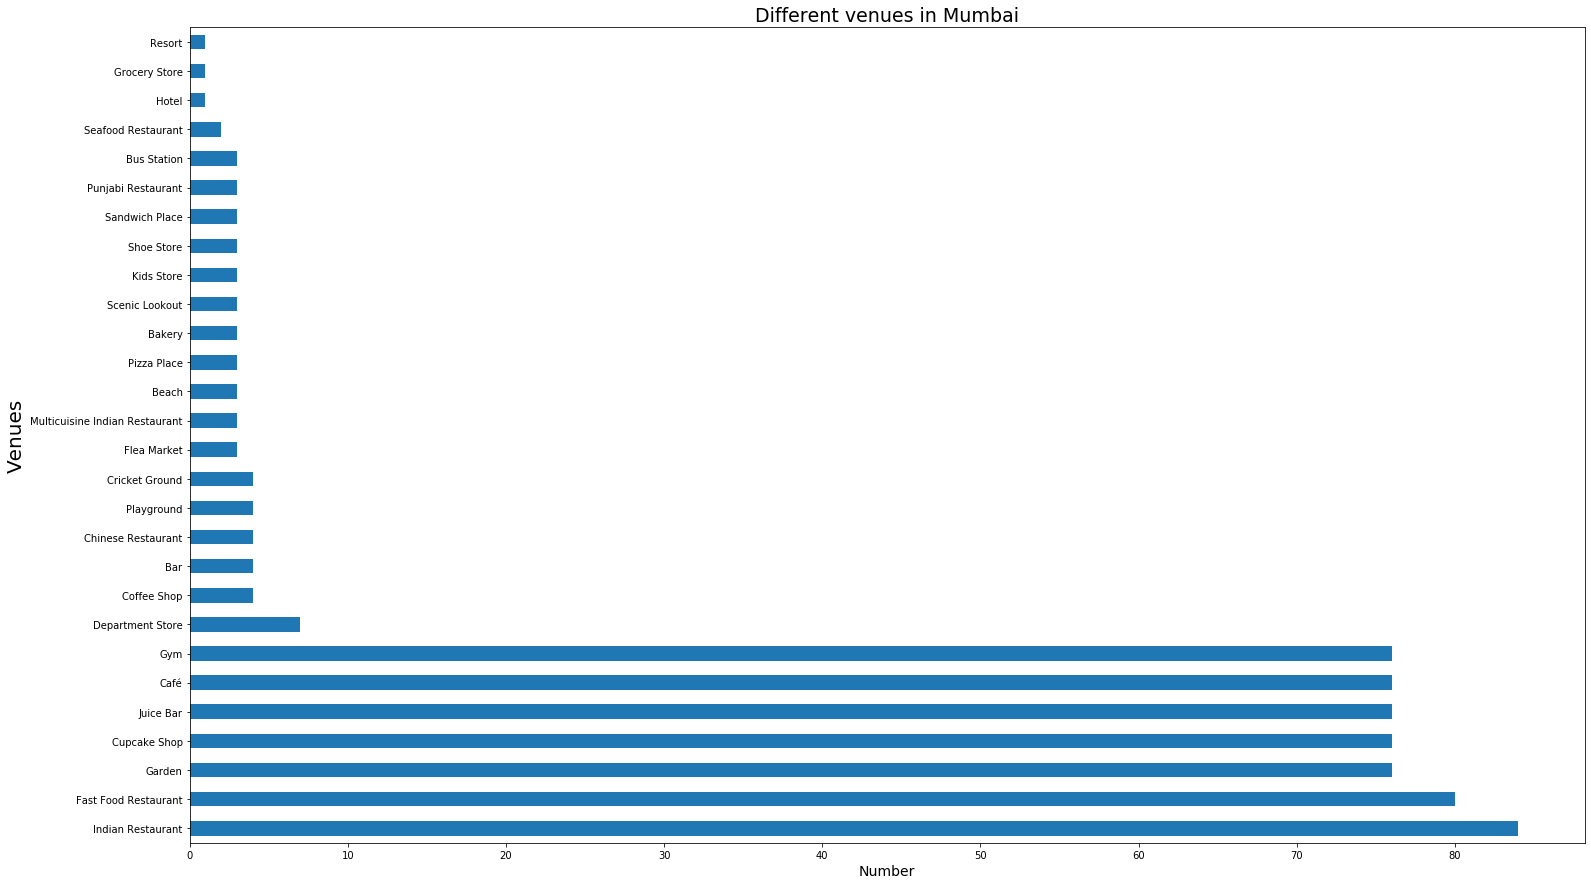

In [54]:
mumbai_Venues['Venue Category'].value_counts().plot(kind='barh', figsize=(25, 15))
plt.ylabel("Venues", fontsize=20)
plt.xlabel("Number", fontsize=14)
plt.title("Different venues in Mumbai",fontsize=19);

In [55]:
mumbai_onehot = pd.get_dummies(mumbai_Venues[['Venue Category']], prefix="", prefix_sep="")
# add neighborhood column back to dataframe
mumbai_onehot['neighborhood'] =mumbai_Venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [mumbai_onehot.columns[-1]] + list(mumbai_onehot.columns[:-1])
mumbai_onehot = mumbai_onehot[fixed_columns]
mumbai_onehot.head()

,neighborhood,Bakery,Bar,Beach,Bus Station,Café,Chinese Restaurant,Coffee Shop,Cricket Ground,Cupcake Shop,...,Kids Store,Multicuisine Indian Restaurant,Pizza Place,Playground,Punjabi Restaurant,Resort,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store
0,"Bazargate S.O,Elephanta Caves Po B.O,M.P.T. S....",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Bazargate S.O,Elephanta Caves Po B.O,M.P.T. S....",0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Bazargate S.O,Elephanta Caves Po B.O,M.P.T. S....",0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,"Bazargate S.O,Elephanta Caves Po B.O,M.P.T. S....",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Bazargate S.O,Elephanta Caves Po B.O,M.P.T. S....",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
m = mumbai_onehot.groupby('neighborhood').mean().reset_index()
num_top_venues = 5

for hood in m['neighborhood']:
    print("----"+hood+"----")
    temp = m[m['neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))


----A I Staff Colony S.O,Santacruz P&t Colony S.O----
                  venue  freq
0                   Gym  0.14
1     Indian Restaurant  0.14
2                  Café  0.14
3          Cupcake Shop  0.14
4  Fast Food Restaurant  0.14
----Aareymilk Colony S.O,Nagari Niwara S.O,S R P F Camp S.O----
                  venue  freq
0                   Gym  0.14
1     Indian Restaurant  0.14
2                  Café  0.14
3          Cupcake Shop  0.14
4  Fast Food Restaurant  0.14
----Abitghar B.O,Abje B.O,Alonde B.O,Baliwali B.O,Dohe B.O,Gargoan B.O,Gorhe B.O,Hamarapur B.O,Kalambe B.O,Kanchad B.O,Khare Ambiwali B.O,Khariwali B.O,Kone B.O,Mala B.O,Malwada B.O,Maniwali B.O,Moj B.O,Parali B.O,Pik B.O,Posheri B.O,Sonale B.O,Tuse B.O,Utawali B.O,Varale B.O,Vilkos B.O,Wada S.O,Waki B.O----
                venue  freq
0          Shoe Store  0.25
1  Punjabi Restaurant  0.25
2    Department Store  0.25
3   Indian Restaurant  0.25
4               Hotel  0.00
----Acchad B.O,Dabhadi B.O,Dhaniwari B.O,Dhu

In [57]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sortedm = pd.DataFrame(columns=columns)
neighborhoods_venues_sortedm['neighborhood'] = m['neighborhood']



In [58]:
for ind in np.arange(m.shape[0]):
    neighborhoods_venues_sortedm.iloc[ind, 1:] = return_most_common_venues(m.iloc[ind, :], num_top_venues)

neighborhoods_venues_sortedm.head()
# set number of clusters
kclusters = 5

m_cluster = m.drop('neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(m_cluster)

# check cluster labels generated for each row in the dataframe
labels=kmeans.labels_
neighborhoods_venues_sortedm['labels']=labels
neighborhoods_venues_sortedm

,neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,labels
0,"A I Staff Colony S.O,Santacruz P&t Colony S.O",Café,Cupcake Shop,Juice Bar,Indian Restaurant,Gym,Fast Food Restaurant,Garden,Shoe Store,Flea Market,Bar,0
1,"Aareymilk Colony S.O,Nagari Niwara S.O,S R P F...",Café,Cupcake Shop,Juice Bar,Indian Restaurant,Gym,Fast Food Restaurant,Garden,Shoe Store,Flea Market,Bar,0
2,"Abitghar B.O,Abje B.O,Alonde B.O,Baliwali B.O,...",Shoe Store,Punjabi Restaurant,Indian Restaurant,Department Store,Garden,Bar,Beach,Bus Station,Café,Chinese Restaurant,3
3,"Acchad B.O,Dabhadi B.O,Dhaniwari B.O,Dhundalwa...",Scenic Lookout,Bus Station,Shoe Store,Garden,Bar,Beach,Café,Chinese Restaurant,Coffee Shop,Cricket Ground,1
4,"Agardanda B.O,Janjira Murud S.O,Kashid B.O,Maz...",Beach,Resort,Indian Restaurant,Department Store,Seafood Restaurant,Shoe Store,Flea Market,Bar,Bus Station,Café,3
...,...,...,...,...,...,...,...,...,...,...,...,...
87,Sewri S.O,Café,Cupcake Shop,Juice Bar,Indian Restaurant,Gym,Fast Food Restaurant,Garden,Shoe Store,Flea Market,Bar,0
88,V J B Udyan S.O,Café,Cupcake Shop,Juice Bar,Indian Restaurant,Gym,Fast Food Restaurant,Garden,Shoe Store,Flea Market,Bar,0
89,Vidyanagari S.O,Café,Cupcake Shop,Juice Bar,Indian Restaurant,Gym,Fast Food Restaurant,Garden,Shoe Store,Flea Market,Bar,0
90,Wagle I.E. S.O,Bakery,Flea Market,Sandwich Place,Pizza Place,Multicuisine Indian Restaurant,Kids Store,Department Store,Bar,Beach,Bus Station,3


In [59]:

m_merged = mumbai
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
m_merged = m_merged.join(neighborhoods_venues_sortedm.set_index('neighborhood'), on='neighborhood')

(97, 16)

In [60]:
m_merged.dropna(axis=0,inplace=True)
m_merged["labels"] = m_merged["labels"].astype(int)
m_merged.head()

,pincode,latitude,longitude,regionname,neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,labels
0,400001,19.0167,72.85,Mumbai,"Bazargate S.O,Elephanta Caves Po B.O,M.P.T. S....",Café,Cupcake Shop,Juice Bar,Indian Restaurant,Gym,Fast Food Restaurant,Garden,Shoe Store,Flea Market,Bar,0
1,400002,19.0167,72.85,Mumbai,"Kalbadevi H.O,Ramwadi S.O,S. C. Court S.O,Thak...",Café,Cupcake Shop,Juice Bar,Indian Restaurant,Gym,Fast Food Restaurant,Garden,Shoe Store,Flea Market,Bar,0
2,400003,19.0167,72.85,Mumbai,"B.P.Lane S.O,Mandvi S.O (Mumbai),Masjid S.O,Nu...",Café,Cupcake Shop,Juice Bar,Indian Restaurant,Gym,Fast Food Restaurant,Garden,Shoe Store,Flea Market,Bar,0
3,400004,19.0167,72.85,Mumbai,"Ambewadi S.O (Mumbai),Charni Road S.O,Chaupati...",Café,Cupcake Shop,Juice Bar,Indian Restaurant,Gym,Fast Food Restaurant,Garden,Shoe Store,Flea Market,Bar,0
4,400005,19.0167,72.85,Mumbai,"Asvini S.O,Colaba Bazar S.O,Colaba S.O,Holiday...",Café,Cupcake Shop,Juice Bar,Indian Restaurant,Gym,Fast Food Restaurant,Garden,Shoe Store,Flea Market,Bar,0


In [61]:
# create map
map_clusters = folium.Map(location=[19.0167,72.85], zoom_start=8)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(m_merged['latitude'], m_merged['longitude'],m_merged['neighborhood'], m_merged['labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [62]:
#kolkata
kolkata_Venues = getNearbyVenues(names=kolkata['neighborhood'],
                                   latitudes=kolkata['latitude'],
                                   longitudes=kolkata['longitude']
                                  )

Council House Street S.O,Customs House S.O,Khengrapatti S.O,Lalbazar S.O (Kolkata),New Secretariat Bldg. S.O,Pollock Street S.O,R.N. Mukherjee Road S.O,Radha Bazar S.O,Reserve Bank Building S.O,Telephone Bhawan S.O,Treasury Building S.O,W.B.Assembly House S.O,Writer's Building S.O,Kolkatta G.P.O. 
Cossipore Gun Factory S.O,Cossipore H.O,Indian Research S.O,Kolkata Armed Police S.O,Paikapara S.O,Postal Stores Depot S.O,Satchasipara S.O,Tala S.O
Amrita Bazar Partika S.O,Baghbazar S.O,Girish Avenue S.O
R.G.Kar Medical College S.O,Shyambazar Mail S.O,Ultadanga S.O
Ahritola S.O,Hatkhola S.O
Beadon Street S.O,Bidhan Sarani S.O,Jorasanko S.O,Manicktala S.O,Pathuriaghata S.O,Sahitya Parisad S.O,Simla S.O
Barabazar H.O,College Square S.O (Kolkata),Strand Road S.O,Archana S.O,Kalakar Street S.O,Vaishya Sabha S.O
Barisha S.O
Parsibagan S.O,Raja Ram Mohan Sarani S.O
Beleghata H.O,Joramandir S.O,Subhash Sarabor S.O
Narkeldanga S.O
Bowbazar S.O (Kolkata),Yogayog Bhawan S.O,Sankaritola S.O
Dharmatala

In [63]:
kolkata_onehot = pd.get_dummies(kolkata_Venues[['Venue Category']], prefix="", prefix_sep="")
# add neighborhood column back to dataframe
kolkata_onehot['neighborhood'] =kolkata_Venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [kolkata_onehot.columns[-1]] + list(kolkata_onehot.columns[:-1])
kolkata_onehot = kolkata_onehot[fixed_columns]
kolkata_onehot.head()

,neighborhood,ATM,Bus Station,Business Service,Café,Department Store,Indian Sweet Shop,Juice Bar,Market,Pharmacy,Plaza,Train Station
0,"Council House Street S.O,Customs House S.O,Khe...",0,0,0,0,0,1,0,0,0,0,0
1,"Council House Street S.O,Customs House S.O,Khe...",0,0,0,0,1,0,0,0,0,0,0
2,"Council House Street S.O,Customs House S.O,Khe...",0,0,0,1,0,0,0,0,0,0,0
3,"Council House Street S.O,Customs House S.O,Khe...",0,0,0,1,0,0,0,0,0,0,0
4,"Council House Street S.O,Customs House S.O,Khe...",0,0,0,0,0,0,0,0,0,1,0


In [65]:
k_areas=kolkata_Venues['Venue Category'].nunique()
kolkata_Venues['Venue Category'].value_counts()


Café                 308
Department Store     154
Train Station        154
Plaza                154
Juice Bar            154
Indian Sweet Shop    154
Bus Station            4
ATM                    4
Pharmacy               3
Business Service       3
Market                 3
Name: Venue Category, dtype: int64

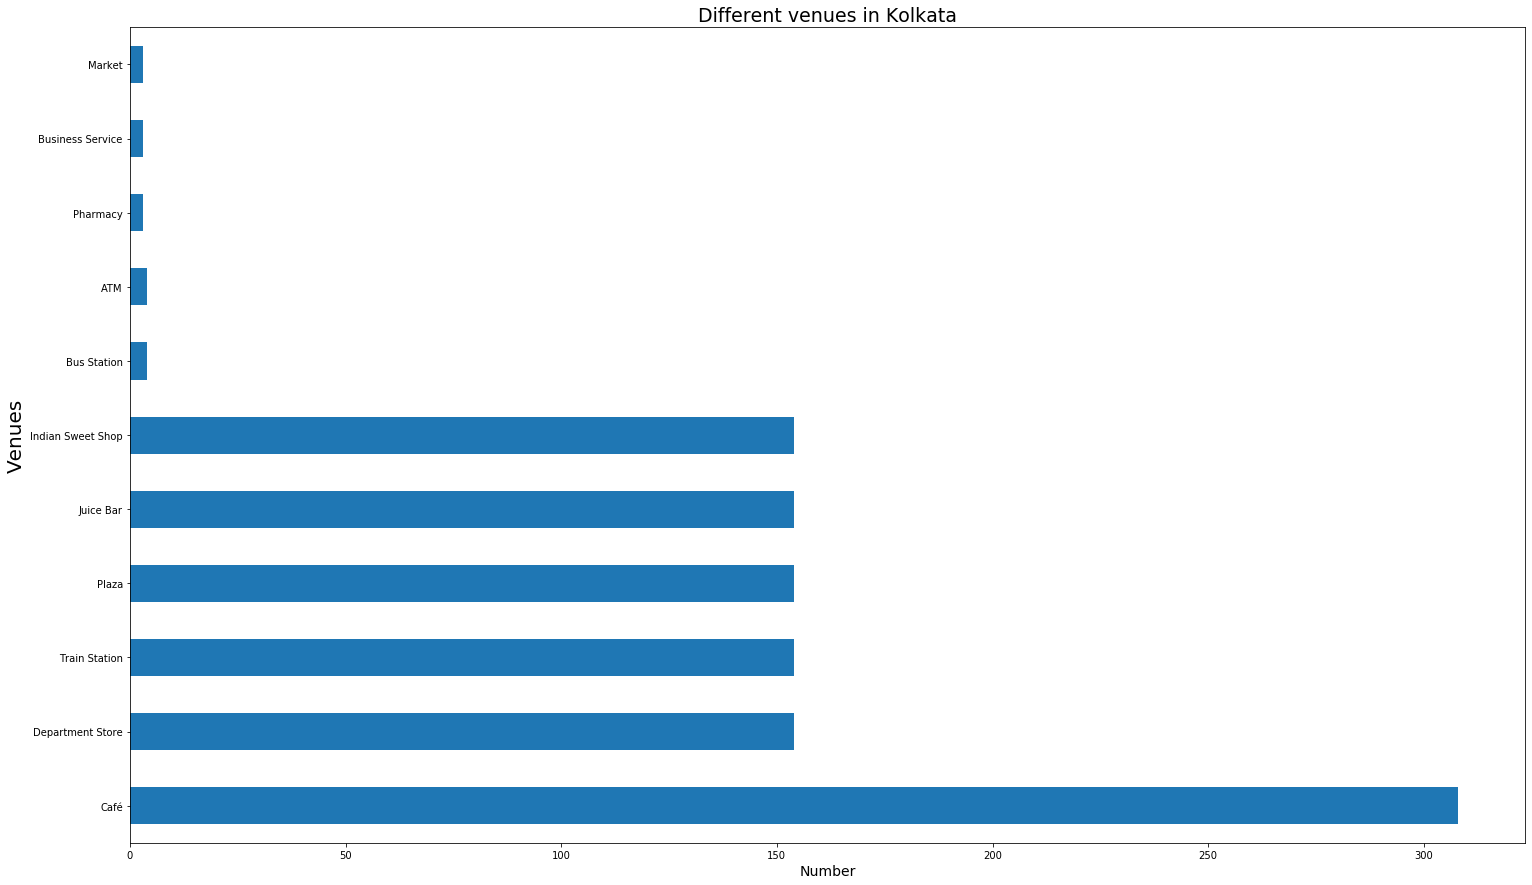

In [66]:
kolkata_Venues['Venue Category'].value_counts().plot(kind='barh', figsize=(25, 15))
plt.ylabel("Venues", fontsize=20)
plt.xlabel("Number", fontsize=14)
plt.title("Different venues in Kolkata",fontsize=19);

In [67]:
kol = kolkata_onehot.groupby('neighborhood').mean().reset_index()
kol

,neighborhood,ATM,Bus Station,Business Service,Café,Department Store,Indian Sweet Shop,Juice Bar,Market,Pharmacy,Plaza,Train Station
0,"A.J.C.Bose Road S.O,Gokhel Road S.O,K.M.Hospit...",0.0,0.0,0.0,0.285714,0.142857,0.142857,0.142857,0.0,0.0,0.142857,0.142857
1,Abdalpur S.O,0.0,0.0,0.0,0.285714,0.142857,0.142857,0.142857,0.0,0.0,0.142857,0.142857
2,"Abinash Chaowdhury Lane S.O,Gobinda Khatick Ro...",0.0,0.0,0.0,0.285714,0.142857,0.142857,0.142857,0.0,0.0,0.142857,0.142857
3,"Achhipur B.O,Benjanharia B.O,Pujali S.O,Purba ...",0.0,0.0,0.0,0.285714,0.142857,0.142857,0.142857,0.0,0.0,0.142857,0.142857
4,Agarpara S.O,0.0,0.0,0.0,0.285714,0.142857,0.142857,0.142857,0.0,0.0,0.142857,0.142857
...,...,...,...,...,...,...,...,...,...,...,...,...
156,"Sonai S.O (Kolkata),South Eastern Railway S.O",0.0,0.0,0.0,0.285714,0.142857,0.142857,0.142857,0.0,0.0,0.142857,0.142857
157,Subhas Gram S.O,0.0,0.0,0.0,0.285714,0.142857,0.142857,0.142857,0.0,0.0,0.142857,0.142857
158,Sukchar S.O (North 24 Parganas),0.0,0.0,0.0,0.285714,0.142857,0.142857,0.142857,0.0,0.0,0.142857,0.142857
159,Vip Nagar S.O,0.0,0.0,0.0,0.285714,0.142857,0.142857,0.142857,0.0,0.0,0.142857,0.142857


In [68]:
num_top_venues = 5

for hood in kol['neighborhood']:
    print("----"+hood+"----")
    temp = kol[kol['neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))


----A.J.C.Bose Road S.O,Gokhel Road S.O,K.M.Hospital S.O,L.R.Sarani S.O----
               venue  freq
0               Café  0.29
1   Department Store  0.14
2  Indian Sweet Shop  0.14
3          Juice Bar  0.14
4              Plaza  0.14
----Abdalpur S.O----
               venue  freq
0               Café  0.29
1   Department Store  0.14
2  Indian Sweet Shop  0.14
3          Juice Bar  0.14
4              Plaza  0.14
----Abinash Chaowdhury Lane S.O,Gobinda Khatick Road S.O----
               venue  freq
0               Café  0.29
1   Department Store  0.14
2  Indian Sweet Shop  0.14
3          Juice Bar  0.14
4              Plaza  0.14
----Achhipur B.O,Benjanharia B.O,Pujali S.O,Purba Nischintapur B.O----
               venue  freq
0               Café  0.29
1   Department Store  0.14
2  Indian Sweet Shop  0.14
3          Juice Bar  0.14
4              Plaza  0.14
----Agarpara S.O----
               venue  freq
0               Café  0.29
1   Department Store  0.14
2  Indian Sweet Shop 

In [69]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['neighborhood'] = kol['neighborhood']


In [70]:
for ind in np.arange(kol.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(kol.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()
# set number of clusters
kclusters = 5

k_cluster = kol.drop('neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(k_cluster)

# check cluster labels generated for each row in the dataframe
labels=kmeans.labels_
neighborhoods_venues_sorted['labels']=labels
neighborhoods_venues_sorted

C:\Users\91984\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return_n_iter=True)


,neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,labels
0,"A.J.C.Bose Road S.O,Gokhel Road S.O,K.M.Hospit...",Café,Train Station,Plaza,Juice Bar,Indian Sweet Shop,Department Store,Pharmacy,Market,Business Service,Bus Station,0
1,Abdalpur S.O,Café,Train Station,Plaza,Juice Bar,Indian Sweet Shop,Department Store,Pharmacy,Market,Business Service,Bus Station,0
2,"Abinash Chaowdhury Lane S.O,Gobinda Khatick Ro...",Café,Train Station,Plaza,Juice Bar,Indian Sweet Shop,Department Store,Pharmacy,Market,Business Service,Bus Station,0
3,"Achhipur B.O,Benjanharia B.O,Pujali S.O,Purba ...",Café,Train Station,Plaza,Juice Bar,Indian Sweet Shop,Department Store,Pharmacy,Market,Business Service,Bus Station,0
4,Agarpara S.O,Café,Train Station,Plaza,Juice Bar,Indian Sweet Shop,Department Store,Pharmacy,Market,Business Service,Bus Station,0
...,...,...,...,...,...,...,...,...,...,...,...,...
156,"Sonai S.O (Kolkata),South Eastern Railway S.O",Café,Train Station,Plaza,Juice Bar,Indian Sweet Shop,Department Store,Pharmacy,Market,Business Service,Bus Station,0
157,Subhas Gram S.O,Café,Train Station,Plaza,Juice Bar,Indian Sweet Shop,Department Store,Pharmacy,Market,Business Service,Bus Station,0
158,Sukchar S.O (North 24 Parganas),Café,Train Station,Plaza,Juice Bar,Indian Sweet Shop,Department Store,Pharmacy,Market,Business Service,Bus Station,0
159,Vip Nagar S.O,Café,Train Station,Plaza,Juice Bar,Indian Sweet Shop,Department Store,Pharmacy,Market,Business Service,Bus Station,0


In [71]:
k_merged = kolkata
k_merged = k_merged.join(neighborhoods_venues_sorted.set_index('neighborhood'), on='neighborhood')
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood

k_merged.dropna(axis=0,inplace=True)
k_merged["labels"] = k_merged["labels"].astype(int)
k_merged

,pincode,latitude,longitude,regionname,neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,labels
0,700001,22.5690,88.3697,Calcutta,"Council House Street S.O,Customs House S.O,Khe...",Café,Train Station,Plaza,Juice Bar,Indian Sweet Shop,Department Store,Pharmacy,Market,Business Service,Bus Station,0
1,700002,22.5690,88.3697,Calcutta,"Cossipore Gun Factory S.O,Cossipore H.O,Indian...",Café,Train Station,Plaza,Juice Bar,Indian Sweet Shop,Department Store,Pharmacy,Market,Business Service,Bus Station,0
2,700003,22.5690,88.3697,Calcutta,"Amrita Bazar Partika S.O,Baghbazar S.O,Girish ...",Café,Train Station,Plaza,Juice Bar,Indian Sweet Shop,Department Store,Pharmacy,Market,Business Service,Bus Station,0
3,700004,22.5690,88.3697,Calcutta,"R.G.Kar Medical College S.O,Shyambazar Mail S....",Café,Train Station,Plaza,Juice Bar,Indian Sweet Shop,Department Store,Pharmacy,Market,Business Service,Bus Station,0
4,700005,22.5690,88.3697,Calcutta,"Ahritola S.O,Hatkhola S.O",Café,Train Station,Plaza,Juice Bar,Indian Sweet Shop,Department Store,Pharmacy,Market,Business Service,Bus Station,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,731237,23.9500,87.6667,Calcutta,"Bandhkhola B.O,Bara B.O,Bhadrapur B.O,Gopalcha...",Bus Station,ATM,Train Station,Plaza,Pharmacy,Market,Juice Bar,Indian Sweet Shop,Department Store,Café,1
173,731238,23.9500,87.6667,Calcutta,"Bhadista B.O,Bishore B.O,Chatra S.O (Birbhum),...",Bus Station,ATM,Train Station,Plaza,Pharmacy,Market,Juice Bar,Indian Sweet Shop,Department Store,Café,1
174,731240,22.9667,88.7833,Calcutta,"Bahiri S.O,Banagram B.O,Bangachhatra B.O,Gheed...",Pharmacy,Market,Business Service,Train Station,Plaza,Juice Bar,Indian Sweet Shop,Department Store,Café,Bus Station,2
175,731241,22.9667,88.7833,Calcutta,"Chandpara S.O,Dunigram B.O,Koyemba B.O,Nonadan...",Pharmacy,Market,Business Service,Train Station,Plaza,Juice Bar,Indian Sweet Shop,Department Store,Café,Bus Station,2


In [72]:
# create map
map_clusters = folium.Map(location=[22.5690,88.3697], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(k_merged['latitude'], k_merged['longitude'],m_merged['neighborhood'], k_merged['labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [73]:
#chennai

chennai_Venues = getNearbyVenues(names=Chennai['neighborhood'],
                                   latitudes=Chennai['latitude'],
                                   longitudes=Chennai['longitude']
                                  )

Flower Bazaar S.O,Govt Stanley Hospital S.O,Mannady S.O (Chennai),Mint Building S.O,MPT AO S.O,Sowcarpet S.O,Chennai G.P.O. 
Anna Road H.O,Chintadripet S.O,Madras Electricity System S.O
Edapalayam S.O,Madras Medical College S.O,Park Town H.O,Ripon Buildings S.O
Mandaveli S.O,Mylapore H.O,Vivekananda College Madras S.O
Chepauk S.O,Madras University S.O,Tiruvallikkeni S.O
Greams Road S.O,Old College Buildings S.O,Shastri Bhavan S.O,Teynampet West S.O
Egmore ND S.O,Egmore S.O,Ethiraj Salai S.O
Fort St George S.O
Perambur Barracks S.O,Puliyanthope S.O,Venkatesapuram S.O
Lloyds Estate S.O,Royapettah S.O,Triplicane South S.O
Guindy North S.O,Saidapet S.O (Chennai)
Alandur(Reopened W.E.F.6.6.05) S.O,Chennai Airport S.O,Meenambakkam S.O,St.Thomas Mount H.O
Hindi Prachar Sabha S.O,Thygarayanagar H.O,Thygarayanagar North ND S.O,Thygarayanagar South NDS.O
Pr. Accountant General S.O,Teynampet S.O
Kaladipet S.O,Shanmugapuram S.O,Tiruvottiyur S.O,Tiruvottiyur West S.O,Tondiarpet Rly Colony B.O
Adyar

In [74]:
chennai_onehot = pd.get_dummies(chennai_Venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
chennai_onehot['neighborhood'] =chennai_Venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [chennai_onehot.columns[-1]] + list(chennai_onehot.columns[:-1])
chennai_onehot = chennai_onehot[fixed_columns]
chennai_onehot.head()

,neighborhood,ATM,African Restaurant,Asian Restaurant,BBQ Joint,Badminton Court,Bakery,Bar,Beach,Bistro,...,Sculpture Garden,Seafood Restaurant,Shopping Mall,Snack Place,South Indian Restaurant,Thai Restaurant,Train,Train Station,Vegetarian / Vegan Restaurant,Women's Store
0,"Flower Bazaar S.O,Govt Stanley Hospital S.O,Ma...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Flower Bazaar S.O,Govt Stanley Hospital S.O,Ma...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Flower Bazaar S.O,Govt Stanley Hospital S.O,Ma...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Flower Bazaar S.O,Govt Stanley Hospital S.O,Ma...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Flower Bazaar S.O,Govt Stanley Hospital S.O,Ma...",0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
c_areas=chennai_Venues['Venue Category'].nunique()
chennai_Venues['Venue Category'].value_counts()


Indian Restaurant                 107
Jewelry Store                      50
Park                               21
Vegetarian / Vegan Restaurant      21
Hotel                              19
Bar                                14
Clothing Store                     11
Multiplex                          10
Sandwich Place                     10
Café                                9
Bakery                              8
Women's Store                       7
Dessert Shop                        7
Bookstore                           6
Chinese Restaurant                  6
General Entertainment               6
Fast Food Restaurant                5
Platform                            5
College Cafeteria                   4
Playground                          4
College Library                     4
Historic Site                       3
Department Store                    3
ATM                                 3
Pizza Place                         3
Bus Station                         3
IT Services 

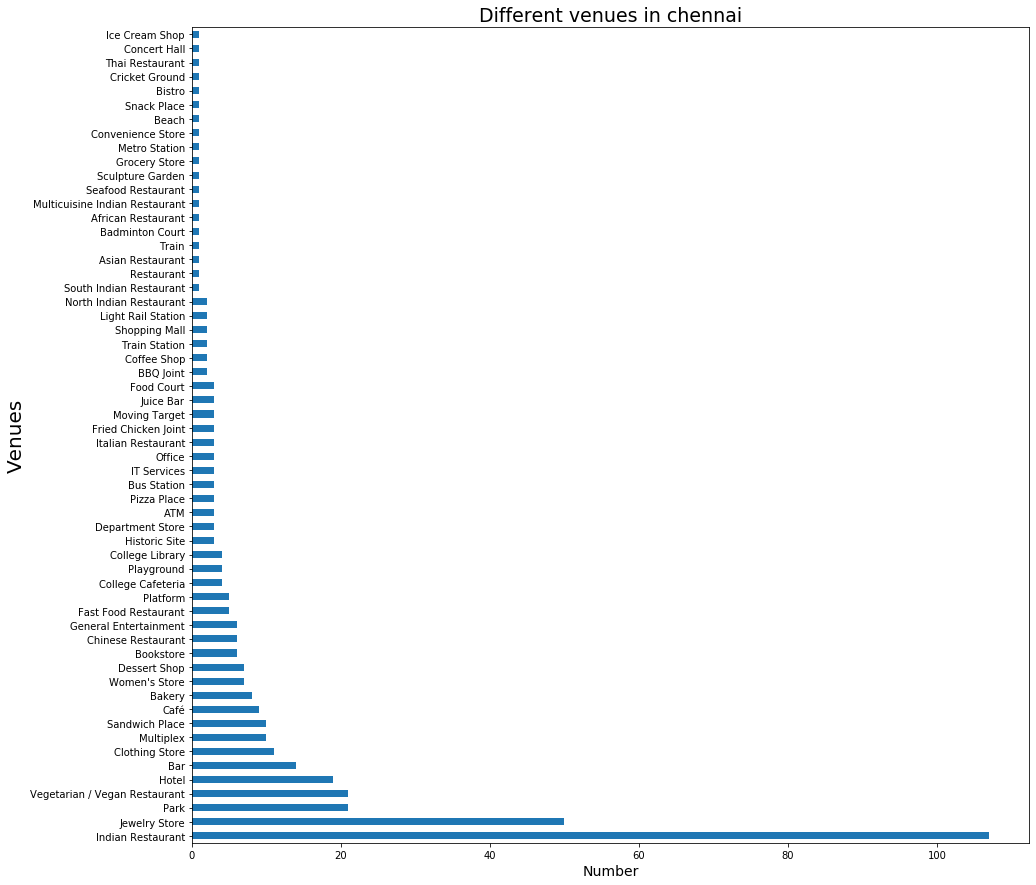

In [76]:
chennai_Venues['Venue Category'].value_counts().plot(kind='barh', figsize=(15, 15))
plt.ylabel("Venues", fontsize=20)
plt.xlabel("Number", fontsize=14)
plt.title("Different venues in chennai",fontsize=19);


In [77]:
c = chennai_onehot.groupby('neighborhood').mean().reset_index()
c

,neighborhood,ATM,African Restaurant,Asian Restaurant,BBQ Joint,Badminton Court,Bakery,Bar,Beach,Bistro,...,Sculpture Garden,Seafood Restaurant,Shopping Mall,Snack Place,South Indian Restaurant,Thai Restaurant,Train,Train Station,Vegetarian / Vegan Restaurant,Women's Store
0,"Acharapakkam R.S. B.O,Acharapakkam S.O,Indalur...",0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0
1,"Adambakkam S.O,Nilamangai Nagar S.O",0.0,0.0,0.0,0.000000,0.0,0.142857,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.142857,0.000000,0.0
2,"Adyar S.O (Chennai),Kasturibai Nagar S.O,Shast...",0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.142857,0.0
3,"Agaram S.O,G K M Colony S.O,Jawahar Nagar S.O ...",0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.142857,0.142857,0.000000,0.0
4,"Alamathi B.O,Boochiathipattu B.O,Edapalayam B....",0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.142857,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,Saligramam S.O,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.142857,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0
63,Tambaram IAF S.O,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.142857,0.0
64,"Tidel Park S.O,TTTI Taramani S.O",0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.142857,0.0
65,Vadapalani S.O,0.0,0.0,0.0,0.142857,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.142857,0.0,0.142857,0.0,0.000000,0.000000,0.142857,0.0


In [78]:
num_top_venues = 5

for hood in c['neighborhood']:
    print("----"+hood+"----")
    temp = c[c['neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Acharapakkam R.S. B.O,Acharapakkam S.O,Indalur B.O,Irumbuli B.O,Kattugudalur B.O,Kayapakkam B.O,Parukkal B.O,Seethapuram B.O----
                venue  freq
0   Indian Restaurant   1.0
1                 ATM   0.0
2         Pizza Place   0.0
3  Italian Restaurant   0.0
4       Jewelry Store   0.0


----Adambakkam S.O,Nilamangai Nagar S.O----
               venue  freq
0  Indian Restaurant  0.29
1        Pizza Place  0.14
2      Train Station  0.14
3             Bakery  0.14
4      Metro Station  0.14


----Adyar S.O (Chennai),Kasturibai Nagar S.O,Shastri Nagar S.O (Chennai)----
                           venue  freq
0        North Indian Restaurant  0.29
1              Indian Restaurant  0.14
2  Vegetarian / Vegan Restaurant  0.14
3                  Grocery Store  0.14
4                      Juice Bar  0.14


----Agaram S.O,G K M Colony S.O,Jawahar Nagar S.O (Chennai),Kumaran Nagar S.O----
                venue  freq
0           Multiplex  0.29
1       Train Station  0.14
2         

In [79]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['neighborhood'] = c['neighborhood']

for ind in np.arange(c.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(c.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Acharapakkam R.S. B.O,Acharapakkam S.O,Indalur...",Indian Restaurant,Women's Store,Coffee Shop,General Entertainment,Fried Chicken Joint,Food Court,Fast Food Restaurant,Dessert Shop,Department Store,Cricket Ground
1,"Adambakkam S.O,Nilamangai Nagar S.O",Indian Restaurant,Train Station,Pizza Place,Bakery,Metro Station,Department Store,Women's Store,Convenience Store,College Library,Concert Hall
2,"Adyar S.O (Chennai),Kasturibai Nagar S.O,Shast...",North Indian Restaurant,Vegetarian / Vegan Restaurant,Indian Restaurant,Fast Food Restaurant,Juice Bar,Grocery Store,Women's Store,College Cafeteria,Fried Chicken Joint,Food Court
3,"Agaram S.O,G K M Colony S.O,Jawahar Nagar S.O ...",Multiplex,Train Station,Train,Pizza Place,Department Store,Light Rail Station,Concert Hall,Coffee Shop,College Cafeteria,College Library
4,"Alamathi B.O,Boochiathipattu B.O,Edapalayam B....",Indian Restaurant,Jewelry Store,Park,Vegetarian / Vegan Restaurant,Coffee Shop,Fried Chicken Joint,Food Court,Fast Food Restaurant,Dessert Shop,Department Store


In [80]:
kclusters = 5

c_cluster = c.drop('neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(c_cluster)

# check cluster labels generated for each row in the dataframe
labels=kmeans.labels_
neighborhoods_venues_sorted['labels']=labels
neighborhoods_venues_sorted

,neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,labels
0,"Acharapakkam R.S. B.O,Acharapakkam S.O,Indalur...",Indian Restaurant,Women's Store,Coffee Shop,General Entertainment,Fried Chicken Joint,Food Court,Fast Food Restaurant,Dessert Shop,Department Store,Cricket Ground,3
1,"Adambakkam S.O,Nilamangai Nagar S.O",Indian Restaurant,Train Station,Pizza Place,Bakery,Metro Station,Department Store,Women's Store,Convenience Store,College Library,Concert Hall,1
2,"Adyar S.O (Chennai),Kasturibai Nagar S.O,Shast...",North Indian Restaurant,Vegetarian / Vegan Restaurant,Indian Restaurant,Fast Food Restaurant,Juice Bar,Grocery Store,Women's Store,College Cafeteria,Fried Chicken Joint,Food Court,1
3,"Agaram S.O,G K M Colony S.O,Jawahar Nagar S.O ...",Multiplex,Train Station,Train,Pizza Place,Department Store,Light Rail Station,Concert Hall,Coffee Shop,College Cafeteria,College Library,1
4,"Alamathi B.O,Boochiathipattu B.O,Edapalayam B....",Indian Restaurant,Jewelry Store,Park,Vegetarian / Vegan Restaurant,Coffee Shop,Fried Chicken Joint,Food Court,Fast Food Restaurant,Dessert Shop,Department Store,2
...,...,...,...,...,...,...,...,...,...,...,...,...
62,Saligramam S.O,Clothing Store,Indian Restaurant,Multiplex,Sandwich Place,Shopping Mall,Hotel,Dessert Shop,Fast Food Restaurant,Coffee Shop,Cricket Ground,1
63,Tambaram IAF S.O,Indian Restaurant,Jewelry Store,Park,Vegetarian / Vegan Restaurant,Coffee Shop,Fried Chicken Joint,Food Court,Fast Food Restaurant,Dessert Shop,Department Store,2
64,"Tidel Park S.O,TTTI Taramani S.O",Office,Sandwich Place,Vegetarian / Vegan Restaurant,Food Court,Fast Food Restaurant,Café,Platform,College Cafeteria,College Library,Concert Hall,1
65,Vadapalani S.O,Clothing Store,Vegetarian / Vegan Restaurant,BBQ Joint,South Indian Restaurant,Shopping Mall,Multiplex,Italian Restaurant,Convenience Store,College Cafeteria,College Library,1


In [81]:
c_merged = Chennai

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
c_merged = c_merged.join(neighborhoods_venues_sorted.set_index('neighborhood'), on='neighborhood')
c_merged.dropna(axis=0,inplace=True)
c_merged["labels"] = c_merged["labels"].astype(int)
c_merged.head() # check the last columns!

,pincode,latitude,longitude,regionname,neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,labels
0,600001,13.0656,80.2672,Chennai Region,"Flower Bazaar S.O,Govt Stanley Hospital S.O,Ma...",Indian Restaurant,General Entertainment,Bar,Dessert Shop,Bookstore,Multiplex,Women's Store,College Cafeteria,Fried Chicken Joint,Food Court,1
1,600002,13.0656,80.2672,Chennai Region,"Anna Road H.O,Chintadripet S.O,Madras Electric...",Indian Restaurant,General Entertainment,Bar,Dessert Shop,Bookstore,Multiplex,Women's Store,College Cafeteria,Fried Chicken Joint,Food Court,1
2,600003,13.0656,80.2672,Chennai Region,"Edapalayam S.O,Madras Medical College S.O,Park...",Indian Restaurant,General Entertainment,Bar,Dessert Shop,Bookstore,Multiplex,Women's Store,College Cafeteria,Fried Chicken Joint,Food Court,1
3,600004,13.0656,80.2672,Chennai Region,"Mandaveli S.O,Mylapore H.O,Vivekananda College...",Indian Restaurant,General Entertainment,Bar,Dessert Shop,Bookstore,Multiplex,Women's Store,College Cafeteria,Fried Chicken Joint,Food Court,1
4,600005,13.0594,80.2789,Chennai Region,"Chepauk S.O,Madras University S.O,Tiruvallikke...",Indian Restaurant,Vegetarian / Vegan Restaurant,Beach,Light Rail Station,Cricket Ground,College Cafeteria,General Entertainment,Fried Chicken Joint,Food Court,Fast Food Restaurant,2


In [82]:
# create map
map_clusters = folium.Map(location=[13.0656,80.2672], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(c_merged['latitude'], c_merged['longitude'],c_merged['neighborhood'], c_merged['labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [26]:
#kanpur

kanpur_Venues = getNearbyVenues(names=kanpur['neighborhood'],
                                   latitudes=kanpur['latitude'],
                                   longitudes=kanpur['longitude']
                                  )

B N Shukla & Sons S.O,Birhana Raod S.O,Colonelganj S.O (Kanpur Nagar),Cotton Mill S.O,Dhankutti S.O,Elgin Mills S.O,Fahimabad S.O,Farrashkhana S.O,Gwaltoli S.O,Hatia S.O (Kanpur Nagar),K M Street S.O,Kanpur Court S.O,Kanpur H.O,Kanpur West S.O,Naveen Market S.O,Nayaganj S.O,Oe Factory S.O,Philkhana S.O,Aanupur B.O,Baripal B.O,Bhandauli B.O,Bibipur B.O,Hathika B.O,Kodwa B.O,Lalpur Shivrajpur B.O,Maitha B.O,Maitha R.S. B.O,Sajeti B.O,Sambhuai B.O
Agriculture College S.O,Arya Nagar S.O (Kanpur Nagar),Employeement Exchange S.O,Gsvm Medical College S.O,Hbti S.O,Motijheel S.O (Kanpur Nagar),N C Line S.O,Nawabganj H.O,Purana Kanpur S.O,Swarup Nagar S.O
Anwarganj S.O,Chauki Jarib S.O
Kanpur Cantt. H.O,Khapra Mohal S.O,Meerpur Cantt S.O,Napier Road S.O,Narona Exchange S.O,Railganj S.O
Hns Nagar S.O,Industrial Estate S.O (Kanpur Nagar,Sarvodaya Nagar S.O,Shivaji Nagar S.O (Kanpur Nagar),Vijai Nagar S.O (Kanpur Nagar)
Cambridge Road S.O,Gandhi Grame S.O,Hal Colony S.O,Harjinder Nagar S.O,Krishna 

In [27]:
kanpur_onehot = pd.get_dummies(kanpur_Venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
kanpur_onehot['neighborhood'] =kanpur_Venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [kanpur_onehot.columns[-1]] + list(kanpur_onehot.columns[:-1])
kanpur_onehot = kanpur_onehot[fixed_columns]
kanpur_onehot.head()

,neighborhood,ATM,Bakery,Bowling Alley,Clothing Store,Convenience Store,Dessert Shop,Fast Food Restaurant,Gym,Hotel,Motorcycle Shop,Multiplex,Park,Pizza Place,Shopping Mall,Tea Room
0,"B N Shukla & Sons S.O,Birhana Raod S.O,Colonel...",0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,"B N Shukla & Sons S.O,Birhana Raod S.O,Colonel...",0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,"B N Shukla & Sons S.O,Birhana Raod S.O,Colonel...",0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,"B N Shukla & Sons S.O,Birhana Raod S.O,Colonel...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,"Agriculture College S.O,Arya Nagar S.O (Kanpur...",0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [28]:
kan_areas=kanpur_Venues['Venue Category'].nunique()
kanpur_Venues['Venue Category'].value_counts()


ATM                     19
Clothing Store           7
Gym                      6
Tea Room                 6
Park                     6
Bakery                   6
Hotel                    6
Shopping Mall            5
Dessert Shop             5
Bowling Alley            5
Multiplex                5
Pizza Place              5
Fast Food Restaurant     5
Convenience Store        1
Motorcycle Shop          1
Name: Venue Category, dtype: int64

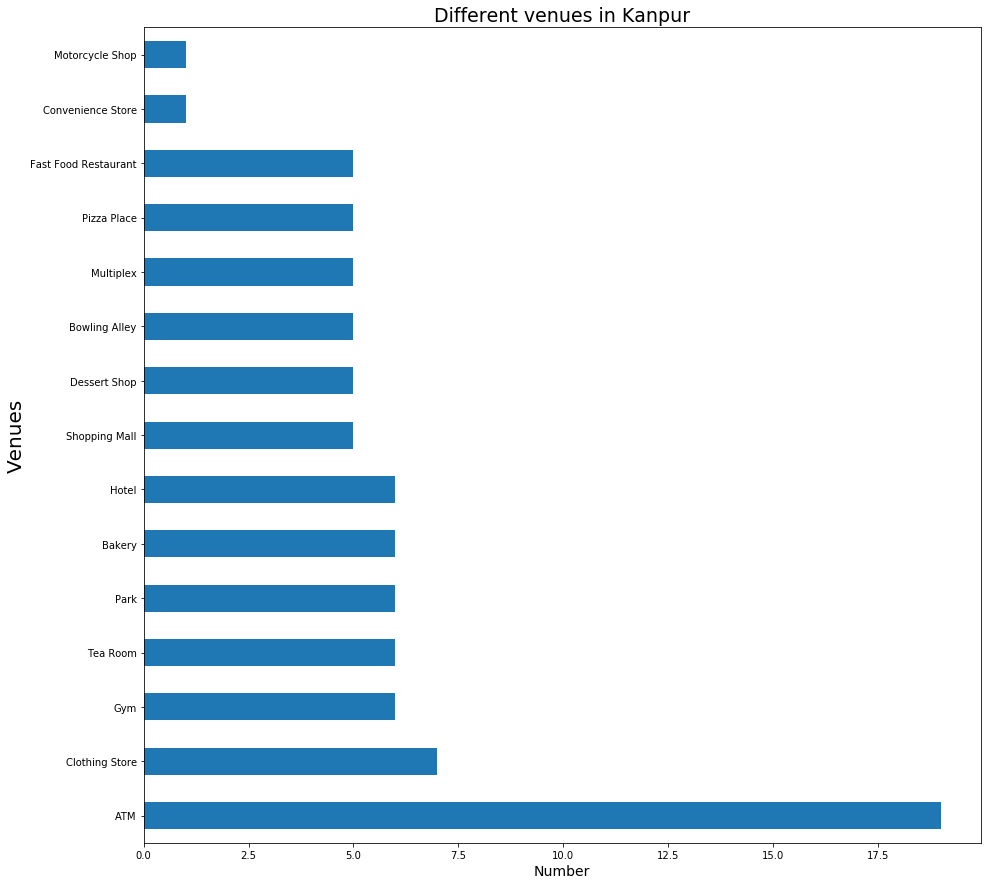

In [29]:
kanpur_Venues['Venue Category'].value_counts().plot(kind='barh', figsize=(15, 15))
plt.ylabel("Venues", fontsize=20)
plt.xlabel("Number", fontsize=14)
plt.title("Different venues in Kanpur",fontsize=19);


In [30]:
kan = kanpur_onehot.groupby('neighborhood').mean().reset_index()
kan

,neighborhood,ATM,Bakery,Bowling Alley,Clothing Store,Convenience Store,Dessert Shop,Fast Food Restaurant,Gym,Hotel,Motorcycle Shop,Multiplex,Park,Pizza Place,Shopping Mall,Tea Room
0,"Aboonagar B.O,Ayah B.O,Banarsi B.O,Baranpur B....",0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,0.00,0.00,0.5,0.000000,0.00,0.000000,0.000000,0.00
1,"Agriculture College S.O,Arya Nagar S.O (Kanpur...",0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.25,0.25,0.0,0.000000,0.25,0.000000,0.000000,0.25
2,"Ahesa B.O,Akohari B.O,Banigaon B.O,Bhusandi B....",1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.00,0.0,0.000000,0.00,0.000000,0.000000,0.00
3,"Anand Nagar S.O (Kanpur Nagar),Kidwai Nagar S....",0.666667,0.333333,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.00,0.0,0.000000,0.00,0.000000,0.000000,0.00
4,"Anwarganj S.O,Chauki Jarib S.O",0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.25,0.25,0.0,0.000000,0.25,0.000000,0.000000,0.25
5,"Avas Vikas Yojna No. 3 S.O,Bairi B.O,Kalyanpur...",0.666667,0.333333,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.00,0.0,0.000000,0.00,0.000000,0.000000,0.00
6,"Awajpur B.O,Baraun B.O,Bazaria Farrukhabad S.O...",1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.00,0.0,0.000000,0.00,0.000000,0.000000,0.00
7,"B N Shukla & Sons S.O,Birhana Raod S.O,Colonel...",0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.25,0.25,0.0,0.000000,0.25,0.000000,0.000000,0.25
8,"Barhpur B.O,Bazaza Bazar S.O,Bharka B.O,Bholey...",0.666667,0.000000,0.000000,0.333333,0.0,0.000000,0.000000,0.00,0.00,0.0,0.000000,0.00,0.000000,0.000000,0.00
9,"Bhopat Patti B.O,Central Jail S.O,Gaisinghpur ...",0.666667,0.000000,0.000000,0.333333,0.0,0.000000,0.000000,0.00,0.00,0.0,0.000000,0.00,0.000000,0.000000,0.00


In [31]:
num_top_venues = 5

for hood in kan['neighborhood']:
    print("----"+hood+"----")
    temp = kan[kan['neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Aboonagar B.O,Ayah B.O,Banarsi B.O,Baranpur B.O,Beragarhiwa B.O,Bhitaura B.O,Bilandpur B.O,Chandiyana S.O,Churiyani B.O,Damapur B.O,Dhakauli B.O,Fatehpur City S.O,Fatehpur Court S.O,Fatehpur H.O,Fatehpur Town S.O,Hariharganj B.O,Kandhi B.O,Korai B.O,Meoli B.O,Ramwan B.O,Sangaon B.O,Shah B.O,Teliyani B.O,Umari B.O----
               venue  freq
0  Convenience Store   0.5
1    Motorcycle Shop   0.5
2                ATM   0.0
3             Bakery   0.0
4      Bowling Alley   0.0


----Agriculture College S.O,Arya Nagar S.O (Kanpur Nagar),Employeement Exchange S.O,Gsvm Medical College S.O,Hbti S.O,Motijheel S.O (Kanpur Nagar),N C Line S.O,Nawabganj H.O,Purana Kanpur S.O,Swarup Nagar S.O----
      venue  freq
0       Gym  0.25
1     Hotel  0.25
2      Park  0.25
3  Tea Room  0.25
4       ATM  0.00


----Ahesa B.O,Akohari B.O,Banigaon B.O,Bhusandi B.O,Devmay B.O,Drehata B.O,Gulauli B.O,Gulriha B.O,Kanchanpur B.O,Kardaha B.O,Lohana B.O,Lowa Singhan Khera B.O,Maurawan S.O,Mawai B.O,Mouddin

In [36]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['neighborhood'] = kan['neighborhood']

for ind in np.arange(kan.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(kan.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Aboonagar B.O,Ayah B.O,Banarsi B.O,Baranpur B....",Motorcycle Shop,Convenience Store,Tea Room,Shopping Mall,Pizza Place,Park,Multiplex,Hotel,Gym,Fast Food Restaurant
1,"Agriculture College S.O,Arya Nagar S.O (Kanpur...",Tea Room,Park,Hotel,Gym,Shopping Mall,Pizza Place,Multiplex,Motorcycle Shop,Fast Food Restaurant,Dessert Shop
2,"Ahesa B.O,Akohari B.O,Banigaon B.O,Bhusandi B....",ATM,Tea Room,Shopping Mall,Pizza Place,Park,Multiplex,Motorcycle Shop,Hotel,Gym,Fast Food Restaurant
3,"Anand Nagar S.O (Kanpur Nagar),Kidwai Nagar S....",ATM,Bakery,Tea Room,Shopping Mall,Pizza Place,Park,Multiplex,Motorcycle Shop,Hotel,Gym
4,"Anwarganj S.O,Chauki Jarib S.O",Tea Room,Park,Hotel,Gym,Shopping Mall,Pizza Place,Multiplex,Motorcycle Shop,Fast Food Restaurant,Dessert Shop


In [37]:
kclusters = 5

kan_cluster = kan.drop('neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(kan_cluster)

# check cluster labels generated for each row in the dataframe
labels=kmeans.labels_
neighborhoods_venues_sorted['labels']=labels
neighborhoods_venues_sorted

,neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,labels
0,"Aboonagar B.O,Ayah B.O,Banarsi B.O,Baranpur B....",Motorcycle Shop,Convenience Store,Tea Room,Shopping Mall,Pizza Place,Park,Multiplex,Hotel,Gym,Fast Food Restaurant,4
1,"Agriculture College S.O,Arya Nagar S.O (Kanpur...",Tea Room,Park,Hotel,Gym,Shopping Mall,Pizza Place,Multiplex,Motorcycle Shop,Fast Food Restaurant,Dessert Shop,0
2,"Ahesa B.O,Akohari B.O,Banigaon B.O,Bhusandi B....",ATM,Tea Room,Shopping Mall,Pizza Place,Park,Multiplex,Motorcycle Shop,Hotel,Gym,Fast Food Restaurant,1
3,"Anand Nagar S.O (Kanpur Nagar),Kidwai Nagar S....",ATM,Bakery,Tea Room,Shopping Mall,Pizza Place,Park,Multiplex,Motorcycle Shop,Hotel,Gym,3
4,"Anwarganj S.O,Chauki Jarib S.O",Tea Room,Park,Hotel,Gym,Shopping Mall,Pizza Place,Multiplex,Motorcycle Shop,Fast Food Restaurant,Dessert Shop,0
5,"Avas Vikas Yojna No. 3 S.O,Bairi B.O,Kalyanpur...",ATM,Bakery,Tea Room,Shopping Mall,Pizza Place,Park,Multiplex,Motorcycle Shop,Hotel,Gym,3
6,"Awajpur B.O,Baraun B.O,Bazaria Farrukhabad S.O...",ATM,Tea Room,Shopping Mall,Pizza Place,Park,Multiplex,Motorcycle Shop,Hotel,Gym,Fast Food Restaurant,1
7,"B N Shukla & Sons S.O,Birhana Raod S.O,Colonel...",Tea Room,Park,Hotel,Gym,Shopping Mall,Pizza Place,Multiplex,Motorcycle Shop,Fast Food Restaurant,Dessert Shop,0
8,"Barhpur B.O,Bazaza Bazar S.O,Bharka B.O,Bholey...",ATM,Clothing Store,Tea Room,Shopping Mall,Pizza Place,Park,Multiplex,Motorcycle Shop,Hotel,Gym,1
9,"Bhopat Patti B.O,Central Jail S.O,Gaisinghpur ...",ATM,Clothing Store,Tea Room,Shopping Mall,Pizza Place,Park,Multiplex,Motorcycle Shop,Hotel,Gym,1


In [38]:
kan_merged = kanpur

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
kan_merged = kan_merged.join(neighborhoods_venues_sorted.set_index('neighborhood'), on='neighborhood')
kan_merged.dropna(axis=0,inplace=True)
kan_merged["labels"] = kan_merged["labels"].astype(int)
kan_merged.head() # check the last columns!

,pincode,latitude,longitude,regionname,neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,labels
0,208001,26.475,80.3083,Kanpur,"B N Shukla & Sons S.O,Birhana Raod S.O,Colonel...",Tea Room,Park,Hotel,Gym,Shopping Mall,Pizza Place,Multiplex,Motorcycle Shop,Fast Food Restaurant,Dessert Shop,0
1,208002,26.475,80.3083,Kanpur,"Agriculture College S.O,Arya Nagar S.O (Kanpur...",Tea Room,Park,Hotel,Gym,Shopping Mall,Pizza Place,Multiplex,Motorcycle Shop,Fast Food Restaurant,Dessert Shop,0
2,208003,26.475,80.3083,Kanpur,"Anwarganj S.O,Chauki Jarib S.O",Tea Room,Park,Hotel,Gym,Shopping Mall,Pizza Place,Multiplex,Motorcycle Shop,Fast Food Restaurant,Dessert Shop,0
3,208004,26.475,80.3083,Kanpur,"Kanpur Cantt. H.O,Khapra Mohal S.O,Meerpur Can...",Tea Room,Park,Hotel,Gym,Shopping Mall,Pizza Place,Multiplex,Motorcycle Shop,Fast Food Restaurant,Dessert Shop,0
4,208005,26.475,80.3083,Kanpur,"Hns Nagar S.O,Industrial Estate S.O (Kanpur Na...",Tea Room,Park,Hotel,Gym,Shopping Mall,Pizza Place,Multiplex,Motorcycle Shop,Fast Food Restaurant,Dessert Shop,0


In [39]:
# create map
map_clusters = folium.Map(location=[26.4750,80.3083], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(kan_merged['latitude'], kan_merged['longitude'],kan_merged['neighborhood'], kan_merged['labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Analysing Clusters


In [83]:
#kolkata clusters 
k_merged.loc[k_merged['labels'] == 0, k_merged.columns[[1] + list(range(5,k_merged.shape[1]))]].head()

,latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,labels
0,22.569,Café,Train Station,Plaza,Juice Bar,Indian Sweet Shop,Department Store,Pharmacy,Market,Business Service,Bus Station,0
1,22.569,Café,Train Station,Plaza,Juice Bar,Indian Sweet Shop,Department Store,Pharmacy,Market,Business Service,Bus Station,0
2,22.569,Café,Train Station,Plaza,Juice Bar,Indian Sweet Shop,Department Store,Pharmacy,Market,Business Service,Bus Station,0
3,22.569,Café,Train Station,Plaza,Juice Bar,Indian Sweet Shop,Department Store,Pharmacy,Market,Business Service,Bus Station,0
4,22.569,Café,Train Station,Plaza,Juice Bar,Indian Sweet Shop,Department Store,Pharmacy,Market,Business Service,Bus Station,0


In [84]:
k_merged.loc[k_merged['labels'] == 1, k_merged.columns[[1] + list(range(5,k_merged.shape[1]))]]

,latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,labels
170,23.95,Bus Station,ATM,Train Station,Plaza,Pharmacy,Market,Juice Bar,Indian Sweet Shop,Department Store,Café,1
171,23.95,Bus Station,ATM,Train Station,Plaza,Pharmacy,Market,Juice Bar,Indian Sweet Shop,Department Store,Café,1
172,23.95,Bus Station,ATM,Train Station,Plaza,Pharmacy,Market,Juice Bar,Indian Sweet Shop,Department Store,Café,1
173,23.95,Bus Station,ATM,Train Station,Plaza,Pharmacy,Market,Juice Bar,Indian Sweet Shop,Department Store,Café,1


In [85]:
k_merged.loc[k_merged['labels'] == 2, k_merged.columns[[1] + list(range(5,k_merged.shape[1]))]]

,latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,labels
174,22.9667,Pharmacy,Market,Business Service,Train Station,Plaza,Juice Bar,Indian Sweet Shop,Department Store,Café,Bus Station,2
175,22.9667,Pharmacy,Market,Business Service,Train Station,Plaza,Juice Bar,Indian Sweet Shop,Department Store,Café,Bus Station,2
176,22.9667,Pharmacy,Market,Business Service,Train Station,Plaza,Juice Bar,Indian Sweet Shop,Department Store,Café,Bus Station,2


In [86]:
#chennai clusters
c_merged.loc[c_merged['labels'] ==0 , c_merged.columns[[1] + list(range(5,c_merged.shape[1]))]].head()

,latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,labels
103,12.1167,Platform,Women's Store,Clothing Store,General Entertainment,Fried Chicken Joint,Food Court,Fast Food Restaurant,Dessert Shop,Department Store,Cricket Ground,0
104,12.1167,Platform,Women's Store,Clothing Store,General Entertainment,Fried Chicken Joint,Food Court,Fast Food Restaurant,Dessert Shop,Department Store,Cricket Ground,0


In [87]:
c_merged.loc[c_merged['labels'] ==1 , c_merged.columns[[1] + list(range(5,c_merged.shape[1]))]].head()

,latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,labels
0,13.0656,Indian Restaurant,General Entertainment,Bar,Dessert Shop,Bookstore,Multiplex,Women's Store,College Cafeteria,Fried Chicken Joint,Food Court,1
1,13.0656,Indian Restaurant,General Entertainment,Bar,Dessert Shop,Bookstore,Multiplex,Women's Store,College Cafeteria,Fried Chicken Joint,Food Court,1
2,13.0656,Indian Restaurant,General Entertainment,Bar,Dessert Shop,Bookstore,Multiplex,Women's Store,College Cafeteria,Fried Chicken Joint,Food Court,1
3,13.0656,Indian Restaurant,General Entertainment,Bar,Dessert Shop,Bookstore,Multiplex,Women's Store,College Cafeteria,Fried Chicken Joint,Food Court,1
5,13.0656,Indian Restaurant,General Entertainment,Bar,Dessert Shop,Bookstore,Multiplex,Women's Store,College Cafeteria,Fried Chicken Joint,Food Court,1


In [88]:
c_merged.loc[c_merged['labels'] ==2 , c_merged.columns[[1] + list(range(5,c_merged.shape[1]))]].head()

,latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,labels
4,13.0594,Indian Restaurant,Vegetarian / Vegan Restaurant,Beach,Light Rail Station,Cricket Ground,College Cafeteria,General Entertainment,Fried Chicken Joint,Food Court,Fast Food Restaurant,2
21,13.0389,Jewelry Store,Women's Store,Clothing Store,Indian Restaurant,Park,Badminton Court,College Library,Fried Chicken Joint,Food Court,African Restaurant,2
22,13.0389,Jewelry Store,Women's Store,Clothing Store,Indian Restaurant,Park,Badminton Court,College Library,Fried Chicken Joint,Food Court,African Restaurant,2
23,13.0389,Jewelry Store,Women's Store,Clothing Store,Indian Restaurant,Park,Badminton Court,College Library,Fried Chicken Joint,Food Court,African Restaurant,2
24,13.0389,Jewelry Store,Women's Store,Clothing Store,Indian Restaurant,Park,Badminton Court,College Library,Fried Chicken Joint,Food Court,African Restaurant,2


In [89]:
c_merged.loc[c_merged['labels'] ==3 , c_merged.columns[[1] + list(range(5,c_merged.shape[1]))]]

,latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,labels
8,13.0025,Indian Restaurant,Hotel,Bar,Coffee Shop,General Entertainment,Fried Chicken Joint,Food Court,Fast Food Restaurant,Dessert Shop,Department Store,3
9,13.0025,Indian Restaurant,Hotel,Bar,Coffee Shop,General Entertainment,Fried Chicken Joint,Food Court,Fast Food Restaurant,Dessert Shop,Department Store,3
10,13.0025,Indian Restaurant,Hotel,Bar,Coffee Shop,General Entertainment,Fried Chicken Joint,Food Court,Fast Food Restaurant,Dessert Shop,Department Store,3
11,13.0025,Indian Restaurant,Hotel,Bar,Coffee Shop,General Entertainment,Fried Chicken Joint,Food Court,Fast Food Restaurant,Dessert Shop,Department Store,3
12,13.0025,Indian Restaurant,Hotel,Bar,Coffee Shop,General Entertainment,Fried Chicken Joint,Food Court,Fast Food Restaurant,Dessert Shop,Department Store,3
13,13.0025,Indian Restaurant,Hotel,Bar,Coffee Shop,General Entertainment,Fried Chicken Joint,Food Court,Fast Food Restaurant,Dessert Shop,Department Store,3
14,13.0025,Indian Restaurant,Hotel,Bar,Coffee Shop,General Entertainment,Fried Chicken Joint,Food Court,Fast Food Restaurant,Dessert Shop,Department Store,3
69,12.5833,Indian Restaurant,Women's Store,Coffee Shop,General Entertainment,Fried Chicken Joint,Food Court,Fast Food Restaurant,Dessert Shop,Department Store,Cricket Ground,3
70,12.5833,Indian Restaurant,Women's Store,Coffee Shop,General Entertainment,Fried Chicken Joint,Food Court,Fast Food Restaurant,Dessert Shop,Department Store,Cricket Ground,3
71,12.5833,Indian Restaurant,Women's Store,Coffee Shop,General Entertainment,Fried Chicken Joint,Food Court,Fast Food Restaurant,Dessert Shop,Department Store,Cricket Ground,3


In [90]:
c_merged.loc[c_merged['labels'] ==4 , c_merged.columns[[1] + list(range(5,c_merged.shape[1]))]]

,latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,labels
65,12.5319,Historic Site,Fried Chicken Joint,Coffee Shop,Grocery Store,General Entertainment,Food Court,Fast Food Restaurant,Dessert Shop,Department Store,Cricket Ground,4
66,12.5319,Historic Site,Fried Chicken Joint,Coffee Shop,Grocery Store,General Entertainment,Food Court,Fast Food Restaurant,Dessert Shop,Department Store,Cricket Ground,4
67,12.5319,Historic Site,Fried Chicken Joint,Coffee Shop,Grocery Store,General Entertainment,Food Court,Fast Food Restaurant,Dessert Shop,Department Store,Cricket Ground,4


In [91]:
#delhi clusters
d_merged.loc[d_merged['labels'] ==0 , d_merged.columns[[1] + list(range(5,d_merged.shape[1]))]].head()

,latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,labels
2,28.6500,Hotel,Fast Food Restaurant,Tibetan Restaurant,Restaurant,Food & Drink Shop,Café,Farm,Electronics Store,Donut Shop,Dessert Shop,0
3,28.6500,Hotel,Fast Food Restaurant,Tibetan Restaurant,Restaurant,Food & Drink Shop,Café,Farm,Electronics Store,Donut Shop,Dessert Shop,0
5,28.6500,Hotel,Fast Food Restaurant,Tibetan Restaurant,Restaurant,Food & Drink Shop,Café,Farm,Electronics Store,Donut Shop,Dessert Shop,0
7,28.6500,Hotel,Fast Food Restaurant,Tibetan Restaurant,Restaurant,Food & Drink Shop,Café,Farm,Electronics Store,Donut Shop,Dessert Shop,0
48,28.6167,Hotel,Indian Restaurant,Restaurant,Spa,Train Station,Café,Electronics Store,Donut Shop,Dessert Shop,Cricket Ground,0


In [92]:
d_merged.loc[d_merged['labels'] ==1 , d_merged.columns[[1] + list(range(5,d_merged.shape[1]))]].head()

,latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,labels
28,28.7556,Indian Restaurant,Train Station,Food Truck,Fast Food Restaurant,Farm,Electronics Store,Donut Shop,Dessert Shop,Cricket Ground,Convenience Store,1
29,28.7556,Indian Restaurant,Train Station,Food Truck,Fast Food Restaurant,Farm,Electronics Store,Donut Shop,Dessert Shop,Cricket Ground,Convenience Store,1
31,28.7556,Indian Restaurant,Train Station,Food Truck,Fast Food Restaurant,Farm,Electronics Store,Donut Shop,Dessert Shop,Cricket Ground,Convenience Store,1
32,28.7556,Indian Restaurant,Train Station,Food Truck,Fast Food Restaurant,Farm,Electronics Store,Donut Shop,Dessert Shop,Cricket Ground,Convenience Store,1
33,28.7556,Indian Restaurant,Train Station,Food Truck,Fast Food Restaurant,Farm,Electronics Store,Donut Shop,Dessert Shop,Cricket Ground,Convenience Store,1


In [93]:
d_merged.loc[d_merged['labels'] ==2, d_merged.columns[[1] + list(range(5,d_merged.shape[1]))]]

,latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,labels
0,28.6333,Food Truck,Café,South Indian Restaurant,Bakery,Plaza,Coffee Shop,Clothing Store,Fast Food Restaurant,Farm,Electronics Store,2
1,28.6333,Historic Site,Soccer Stadium,History Museum,Cricket Ground,Clothing Store,Fast Food Restaurant,Stadium,Art Gallery,Coffee Shop,Farm,2
4,28.6500,Fast Food Restaurant,Indian Restaurant,BBQ Joint,Snack Place,Dessert Shop,Food & Drink Shop,Clothing Store,Farm,Electronics Store,Donut Shop,2
6,28.6833,Breakfast Spot,Playground,Pizza Place,Donut Shop,Coffee Shop,Miscellaneous Shop,Farm,Electronics Store,Dessert Shop,Cricket Ground,2
8,28.5500,Historic Site,Coffee Shop,Fast Food Restaurant,Electronics Store,Indian Restaurant,Café,Art Gallery,BBQ Joint,Bakery,Airport Terminal,2
9,28.5500,Historic Site,Coffee Shop,Fast Food Restaurant,Electronics Store,Indian Restaurant,Café,Art Gallery,BBQ Joint,Bakery,Airport Terminal,2
10,28.5500,Historic Site,Coffee Shop,Fast Food Restaurant,Electronics Store,Indian Restaurant,Café,Art Gallery,BBQ Joint,Bakery,Airport Terminal,2
11,28.5500,Historic Site,Coffee Shop,Fast Food Restaurant,Electronics Store,Indian Restaurant,Café,Art Gallery,BBQ Joint,Bakery,Airport Terminal,2
12,28.5500,Historic Site,Coffee Shop,Fast Food Restaurant,Electronics Store,Indian Restaurant,Café,Art Gallery,BBQ Joint,Bakery,Airport Terminal,2
13,28.5500,Historic Site,Coffee Shop,Fast Food Restaurant,Electronics Store,Indian Restaurant,Café,Art Gallery,BBQ Joint,Bakery,Airport Terminal,2


In [94]:
d_merged.loc[d_merged['labels'] ==3 , d_merged.columns[[1] + list(range(5,d_merged.shape[1]))]].head()

,latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,labels
41,28.6125,ATM,Clothing Store,Men's Store,Mobile Phone Shop,Food & Drink Shop,Farm,Electronics Store,Donut Shop,Dessert Shop,Cricket Ground,3
65,28.6528,ATM,Café,Fast Food Restaurant,Farm,Electronics Store,Donut Shop,Dessert Shop,Cricket Ground,Convenience Store,Coffee Shop,3
66,28.6528,ATM,Café,Fast Food Restaurant,Farm,Electronics Store,Donut Shop,Dessert Shop,Cricket Ground,Convenience Store,Coffee Shop,3
67,28.6528,ATM,Café,Fast Food Restaurant,Farm,Electronics Store,Donut Shop,Dessert Shop,Cricket Ground,Convenience Store,Coffee Shop,3
68,28.6528,ATM,Café,Fast Food Restaurant,Farm,Electronics Store,Donut Shop,Dessert Shop,Cricket Ground,Convenience Store,Coffee Shop,3


In [95]:
d_merged.loc[d_merged['labels'] ==4 , d_merged.columns[[1] + list(range(5,d_merged.shape[1]))]].head()

,latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,labels
39,28.6092,Train Station,IT Services,Snack Place,Café,Farm,Electronics Store,Donut Shop,Dessert Shop,Cricket Ground,Convenience Store,4
40,28.6092,Train Station,IT Services,Snack Place,Café,Farm,Electronics Store,Donut Shop,Dessert Shop,Cricket Ground,Convenience Store,4
42,28.5083,Train Station,Indian Restaurant,Snack Place,Light Rail Station,Café,Farm,Electronics Store,Donut Shop,Dessert Shop,Cricket Ground,4
44,28.6092,Train Station,IT Services,Snack Place,Café,Farm,Electronics Store,Donut Shop,Dessert Shop,Cricket Ground,Convenience Store,4
45,28.6092,Train Station,IT Services,Snack Place,Café,Farm,Electronics Store,Donut Shop,Dessert Shop,Cricket Ground,Convenience Store,4


In [96]:
#mumbai clusters
m_merged.loc[m_merged['labels'] ==0 , m_merged.columns[[1] + list(range(5,m_merged.shape[1]))]].head()

,latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,labels
0,19.0167,Café,Cupcake Shop,Juice Bar,Indian Restaurant,Gym,Fast Food Restaurant,Garden,Shoe Store,Flea Market,Bar,0
1,19.0167,Café,Cupcake Shop,Juice Bar,Indian Restaurant,Gym,Fast Food Restaurant,Garden,Shoe Store,Flea Market,Bar,0
2,19.0167,Café,Cupcake Shop,Juice Bar,Indian Restaurant,Gym,Fast Food Restaurant,Garden,Shoe Store,Flea Market,Bar,0
3,19.0167,Café,Cupcake Shop,Juice Bar,Indian Restaurant,Gym,Fast Food Restaurant,Garden,Shoe Store,Flea Market,Bar,0
4,19.0167,Café,Cupcake Shop,Juice Bar,Indian Restaurant,Gym,Fast Food Restaurant,Garden,Shoe Store,Flea Market,Bar,0


In [97]:
m_merged.loc[m_merged['labels'] ==1 , m_merged.columns[[1] + list(range(5,m_merged.shape[1]))]].head()

,latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,labels
83,19.9167,Scenic Lookout,Bus Station,Shoe Store,Garden,Bar,Beach,Café,Chinese Restaurant,Coffee Shop,Cricket Ground,1
84,19.9167,Scenic Lookout,Bus Station,Shoe Store,Garden,Bar,Beach,Café,Chinese Restaurant,Coffee Shop,Cricket Ground,1
85,19.9167,Scenic Lookout,Bus Station,Shoe Store,Garden,Bar,Beach,Café,Chinese Restaurant,Coffee Shop,Cricket Ground,1


In [98]:
m_merged.loc[m_merged['labels'] ==2, m_merged.columns[[1] + list(range(5,m_merged.shape[1]))]].head()

,latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,labels
96,19.15,Grocery Store,Seafood Restaurant,Bar,Beach,Bus Station,Café,Chinese Restaurant,Coffee Shop,Cricket Ground,Cupcake Shop,2


In [99]:
m_merged.loc[m_merged['labels'] ==3 , m_merged.columns[[1] + list(range(5,m_merged.shape[1]))]].head()

,latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,labels
79,19.2000,Bakery,Flea Market,Sandwich Place,Pizza Place,Multicuisine Indian Restaurant,Kids Store,Department Store,Bar,Beach,Bus Station,3
80,19.2000,Bakery,Flea Market,Sandwich Place,Pizza Place,Multicuisine Indian Restaurant,Kids Store,Department Store,Bar,Beach,Bus Station,3
81,19.2000,Bakery,Flea Market,Sandwich Place,Pizza Place,Multicuisine Indian Restaurant,Kids Store,Department Store,Bar,Beach,Bus Station,3
90,18.6122,Beach,Hotel,Seafood Restaurant,Shoe Store,Garden,Bar,Bus Station,Café,Chinese Restaurant,Coffee Shop,3
91,18.3258,Beach,Resort,Indian Restaurant,Department Store,Seafood Restaurant,Shoe Store,Flea Market,Bar,Bus Station,Café,3


In [100]:
m_merged.loc[m_merged['labels'] ==4 , m_merged.columns[[1] + list(range(5,m_merged.shape[1]))]].head()

,latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,labels
76,19.0778,Bar,Playground,Chinese Restaurant,Coffee Shop,Cricket Ground,Indian Restaurant,Fast Food Restaurant,Shoe Store,Garden,Beach,4
77,19.0778,Bar,Playground,Chinese Restaurant,Coffee Shop,Cricket Ground,Indian Restaurant,Fast Food Restaurant,Shoe Store,Garden,Beach,4
78,19.0778,Bar,Playground,Chinese Restaurant,Coffee Shop,Cricket Ground,Indian Restaurant,Fast Food Restaurant,Shoe Store,Garden,Beach,4
82,19.0778,Bar,Playground,Chinese Restaurant,Coffee Shop,Cricket Ground,Indian Restaurant,Fast Food Restaurant,Shoe Store,Garden,Beach,4


In [40]:
#kanpur clusters
kan_merged.loc[kan_merged['labels'] ==0 , kan_merged.columns[[1] + list(range(5,kan_merged.shape[1]))]].head()

,latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,labels
0,26.475,Tea Room,Park,Hotel,Gym,Shopping Mall,Pizza Place,Multiplex,Motorcycle Shop,Fast Food Restaurant,Dessert Shop,0
1,26.475,Tea Room,Park,Hotel,Gym,Shopping Mall,Pizza Place,Multiplex,Motorcycle Shop,Fast Food Restaurant,Dessert Shop,0
2,26.475,Tea Room,Park,Hotel,Gym,Shopping Mall,Pizza Place,Multiplex,Motorcycle Shop,Fast Food Restaurant,Dessert Shop,0
3,26.475,Tea Room,Park,Hotel,Gym,Shopping Mall,Pizza Place,Multiplex,Motorcycle Shop,Fast Food Restaurant,Dessert Shop,0
4,26.475,Tea Room,Park,Hotel,Gym,Shopping Mall,Pizza Place,Multiplex,Motorcycle Shop,Fast Food Restaurant,Dessert Shop,0


In [41]:
kan_merged.loc[kan_merged['labels'] ==1 , kan_merged.columns[[1] + list(range(5,kan_merged.shape[1]))]].head()

,latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,labels
23,27.3667,ATM,Clothing Store,Tea Room,Shopping Mall,Pizza Place,Park,Multiplex,Motorcycle Shop,Hotel,Gym,1
24,27.3667,ATM,Clothing Store,Tea Room,Shopping Mall,Pizza Place,Park,Multiplex,Motorcycle Shop,Hotel,Gym,1
25,27.4000,ATM,Tea Room,Shopping Mall,Pizza Place,Park,Multiplex,Motorcycle Shop,Hotel,Gym,Fast Food Restaurant,1
35,26.6167,ATM,Tea Room,Shopping Mall,Pizza Place,Park,Multiplex,Motorcycle Shop,Hotel,Gym,Fast Food Restaurant,1


In [42]:
kan_merged.loc[kan_merged['labels'] ==2 , kan_merged.columns[[1] + list(range(5,kan_merged.shape[1]))]].head()

,latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,labels
12,26.4667,Shopping Mall,Pizza Place,Multiplex,Fast Food Restaurant,Dessert Shop,Clothing Store,Bowling Alley,Tea Room,Park,Motorcycle Shop,2
13,26.4667,Shopping Mall,Pizza Place,Multiplex,Fast Food Restaurant,Dessert Shop,Clothing Store,Bowling Alley,Tea Room,Park,Motorcycle Shop,2
14,26.4667,Shopping Mall,Pizza Place,Multiplex,Fast Food Restaurant,Dessert Shop,Clothing Store,Bowling Alley,Tea Room,Park,Motorcycle Shop,2
15,26.4667,Shopping Mall,Pizza Place,Multiplex,Fast Food Restaurant,Dessert Shop,Clothing Store,Bowling Alley,Tea Room,Park,Motorcycle Shop,2
16,26.4667,Shopping Mall,Pizza Place,Multiplex,Fast Food Restaurant,Dessert Shop,Clothing Store,Bowling Alley,Tea Room,Park,Motorcycle Shop,2


In [43]:
kan_merged.loc[kan_merged['labels'] ==3 , kan_merged.columns[[1] + list(range(5,kan_merged.shape[1]))]].head()

,latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,labels
6,26.4833,ATM,Bakery,Tea Room,Shopping Mall,Pizza Place,Park,Multiplex,Motorcycle Shop,Hotel,Gym,3
7,26.4833,ATM,Bakery,Tea Room,Shopping Mall,Pizza Place,Park,Multiplex,Motorcycle Shop,Hotel,Gym,3
8,26.4833,ATM,Bakery,Tea Room,Shopping Mall,Pizza Place,Park,Multiplex,Motorcycle Shop,Hotel,Gym,3
9,26.4833,ATM,Bakery,Tea Room,Shopping Mall,Pizza Place,Park,Multiplex,Motorcycle Shop,Hotel,Gym,3
10,26.4833,ATM,Bakery,Tea Room,Shopping Mall,Pizza Place,Park,Multiplex,Motorcycle Shop,Hotel,Gym,3


In [44]:
kan_merged.loc[kan_merged['labels'] ==4 , kan_merged.columns[[1] + list(range(5,kan_merged.shape[1]))]].head()

,latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,labels
52,25.9333,Motorcycle Shop,Convenience Store,Tea Room,Shopping Mall,Pizza Place,Park,Multiplex,Hotel,Gym,Fast Food Restaurant,4


## Analysing number of distinct venues in each metro

In [101]:
metro=[k_areas,d_areas,c_areas,m_areas]
metro

[11, 47, 58, 28]

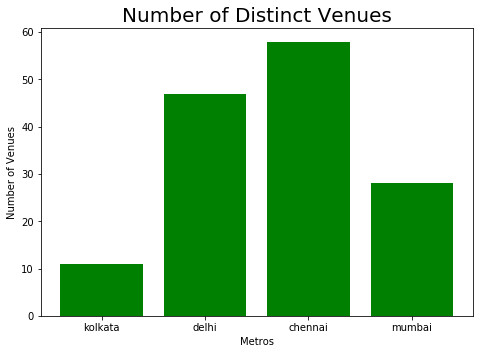

In [102]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(['kolkata','delhi','chennai','mumbai'],metro,color='g')
plt.title("Number of Distinct Venues",fontsize=20)
plt.xlabel("Metros",fontsize=10)
plt.ylabel("Number of Venues",fontsize=10)
plt.show()

<!DOCTYPE html>
<html>
<head>
<style>
table {
  font-family: arial, sans-serif;
  border-collapse: collapse;
  width: 100%;
}

td, th {
  border: 1px solid #dddddd;
  text-align: left;
  padding: 8px;
}

tr:nth-child(odd) {
  background-color: #FFDCF8;
}
</style>
</head>
<body>

<h2>Analysing Clusters</h2>

<table>
  <tr>
   <th>Cluster</th>
    <th>Delhi</th>
    <th>Chennai</th>
    <th>Mumbai</th>
    <th>Kolkata</th>
      <th>Kanpur</th>

  </tr>
  <tr>
    <td><b>0</b></td>
    <td>Tourist places / Historic sites</td>
    <td>Parks / Markets</td>
    <td>Parks/ Cafe's</td>
    <td>Train Stations, Cafe's</td>
    <td>Tea Places, Parks</td>
  
  </tr>
  <tr>
    <td><b>1</b></td>
    <td>Bars / Hotels / cafe's</td>
    <td>Restaurants / bars / entertainment</td>
    <td>Scenic Spots/ bars</td>
    <td>Train Stations, Bus Stations</td>
    <td>Stores</td>
  </tr>
    <tr>
    <td><b>2</b></td>
    <td>Countryide</td>
    <td>Hotels / bars / entertainment</td>
    <td>Market/food joints</td>
    <td>Markets, business services</td>
    <td>Malls</td>
  </tr>
    <tr>
    <td><b>3</b></td>
    <td>Hotels / Restaurants</td>
    <td>Food Joints</td>
    <td>Restaurants, Flea Markets, Beaches</td>
    <td>-</td>
    <td>Bakeries</td>
   
  </tr>
    <tr>
    <td><b>4</b></td>
    <td>Train station / markets/ sports complexes</td>
    <td>Historic Places / food joints</td>
    <td>Playgrounds / bars</td>
     <td>-</td>
    <td>Market</td>
   
  </tr>
</table>

</body>
</html>
